In [13]:
import sys
sys.path.append('/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/dhnlplotting/util')

import glob
import os
from plot_base import PlotBase
from IPython.display import display, Image
import ROOT
ROOT.gROOT.SetStyle("ATLAS")
from array import array
import importlib
import plot_base
import plot_util
import plot_classes
import numpy as np
importlib.reload(plot_base)
importlib.reload(plot_util)
importlib.reload(plot_classes)

output_strings = []
yields = {}

signal_selection = {
    'uuu': "*(DV_2medium > 0) \
            *(DV_mass > 5.5) \
            *(DV_pass_lep_pt >0) \
            *((mll_dMu_plep_is_OS ==1 && (mll_dMu_plep < 80 || mll_dMu_plep > 100)) || mll_dMu_plep_is_SS ==1 ) \
            *(mvis>40 && mvis < 90) \
            *(HNLm<25) \
            *(DV_cosmic_sep > 0.05)",

    'eee': "*(DV_2veryveryloose > 0) \
            *(DV_pass_lep_pt >0) \
            *(DV_mass > 5.5) \
            *((mll_dEl_plep_is_OS ==1 && (mll_dEl_plep < 80 || mll_dEl_plep > 100)) || mll_dEl_plep_is_SS==1) \
            *(DV_pass_mat_veto >0) \
            *(mvis>40 && mvis < 90) \
            *(HNLm<20) \
            *(DV_cosmic_sep > 0.05)",

    'uue': "*(DV_medium_veryveryloose > 0) \
            *(((DV_mass >2 && DV_mass <5.5) && DV_mass > -(7/150) \
            *DV_r + 7 ) || DV_mass > 5.5) \
            *(DV_cosmic_sep > 0.05) \
            *(DV_pass_lep_pt >0) \
            *((mll_dMu_plep_is_OS ==1 && (mll_dMu_plep < 80 || mll_dMu_plep > 100))|| mll_dMu_plep_is_SS ==1) \
            *(mvis>40 && mvis<90) \
            *(HNLm<20) \
            *(DV_cosmic_sep > 0.05)",

    'eeu': "*(DV_medium_veryveryloose > 0) \
            *(((DV_mass >2 && DV_mass <5.5) && DV_mass > -(7/150) \
            *DV_r + 7 ) || DV_mass > 5.5) \
            *(DV_cosmic_sep > 0.05) \
            *(DV_pass_lep_pt >0) \
            *((mll_dEl_plep_is_OS ==1 && (mll_dEl_plep < 80 || mll_dEl_plep > 100))|| mll_dEl_plep_is_SS ==1) \
            *(mvis > 40 && mvis<90) \
            *(HNLm<20) \
            *(DV_cosmic_sep > 0.05)",
}

for hist_file in glob.glob('/data/hnl/histograms/v5p0_histograms/histograms_*.root'):
    if 'histograms_all' in hist_file: continue
    if 'mc16' in hist_file: continue

    tokens = hist_file.split('/')[5].split('_')
#     id = hist_file.split('/')[5].replace('.root', '').replace('histograms_','')
#     print(id)
    file_lifetime = int(tokens[3].split('mm')[0])
    file_mass = float(tokens[2][:-1].replace('p','.'))
    channel = tokens[1]


    hist_channels = [
        {'filename':hist_file.replace('v5p0_histograms', 'v5p0_histograms_electrontrigger'), 
        'label':'Signal selection', 
        'vtx_alg':'VSI_LeptonsMod', 
        'selection':'DVtype', 
        'MCtype':'LNC', 
        'extra_cuts':signal_selection[channel],
        # 'extra_cuts':'',
        },
        {'filename':hist_file, 
        'label':'W/ prompt trigger matching', 
        'vtx_alg':'VSI_LeptonsMod', 
        'selection':'DVtype',
        'MCtype':'LNC', 
        'extra_cuts':signal_selection[channel], # +'*(plep_is_trigger_matched>0)'
        # 'extra_cuts':''+'*(plep_is_trigger_matched>0)',
        },
    ]

    samples = ['uuu', 'uuu_triggermatched',]
    output_dir = '/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/'
    norm = False
    vtx_channel = "VSI_LeptonsMod"

    hist_ratio = plot_classes.Hist1DRatio(hist_channels= hist_channels,

        types = samples,
        output_dir = output_dir,
        name="plep_pt",
        x_title ="prompt lepton p_{T}",
        x_units ="GeV",
        x_min = 0,
        x_max = 100 ,
        y_min = 0,
        rebin = 4,
        use_ntuple = True,
        ntup_nbins =100,
        norm = norm,
        log_scale_y = False,
        draw_markers = True,
        mass = file_mass,
        lifetime = file_lifetime,
        channel = channel,
        extra_legend_lines = [vtx_channel, f'{file_mass} GeV, {file_lifetime}mm, {channel}'],
        ratio_ymin=  -0.1, 
        ratio_ymax = 2.1,
        draw_yield=True,
        save_file=True,
        );

# display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/plep_pt_ratio.png'));

    yield_ratio = np.divide(hist_ratio.yields[1],hist_ratio.yields[0])
    output_string = f'{file_mass} GeV, {file_lifetime}mm, {channel}, {hist_ratio.yields[1]:0.2f}/{hist_ratio.yields[0]:0.2f} = {yield_ratio:0.2f}'
    output_strings.append(f'{file_mass} GeV, {file_lifetime}mm, {channel}, yield: {hist_ratio.yields[1]:0.8f}')
    yields[(channel, file_mass, file_lifetime)] = ((hist_ratio.yields[0], hist_ratio.yields[1]))
    # break


/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:126: RuntimeWarning: invalid value encountered in true_divide
Info in <TCanvas::Print>: pdf file /home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/plep_pt_ratio/uue_3GeV_1mm.pdf has been created
Info in <TCanvas::Print>: png file /home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/plep_pt_ratio/uue_3GeV_1mm.png has been created
Info in <TCanvas::Print>: pdf file /home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/plep_pt_ratio/uuu_12GeV_1mm.pdf has been created
Info in <TCanvas::Print>: png file /home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/plep_pt_ratio/uuu_12GeV_1mm.png has been created
Info in <TCanvas::Print>: pdf file /home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/plep_pt_ratio/eeu_20GeV_1mm.pdf has been created
Info in <TCanvas::Print>: png file /home/newhous

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


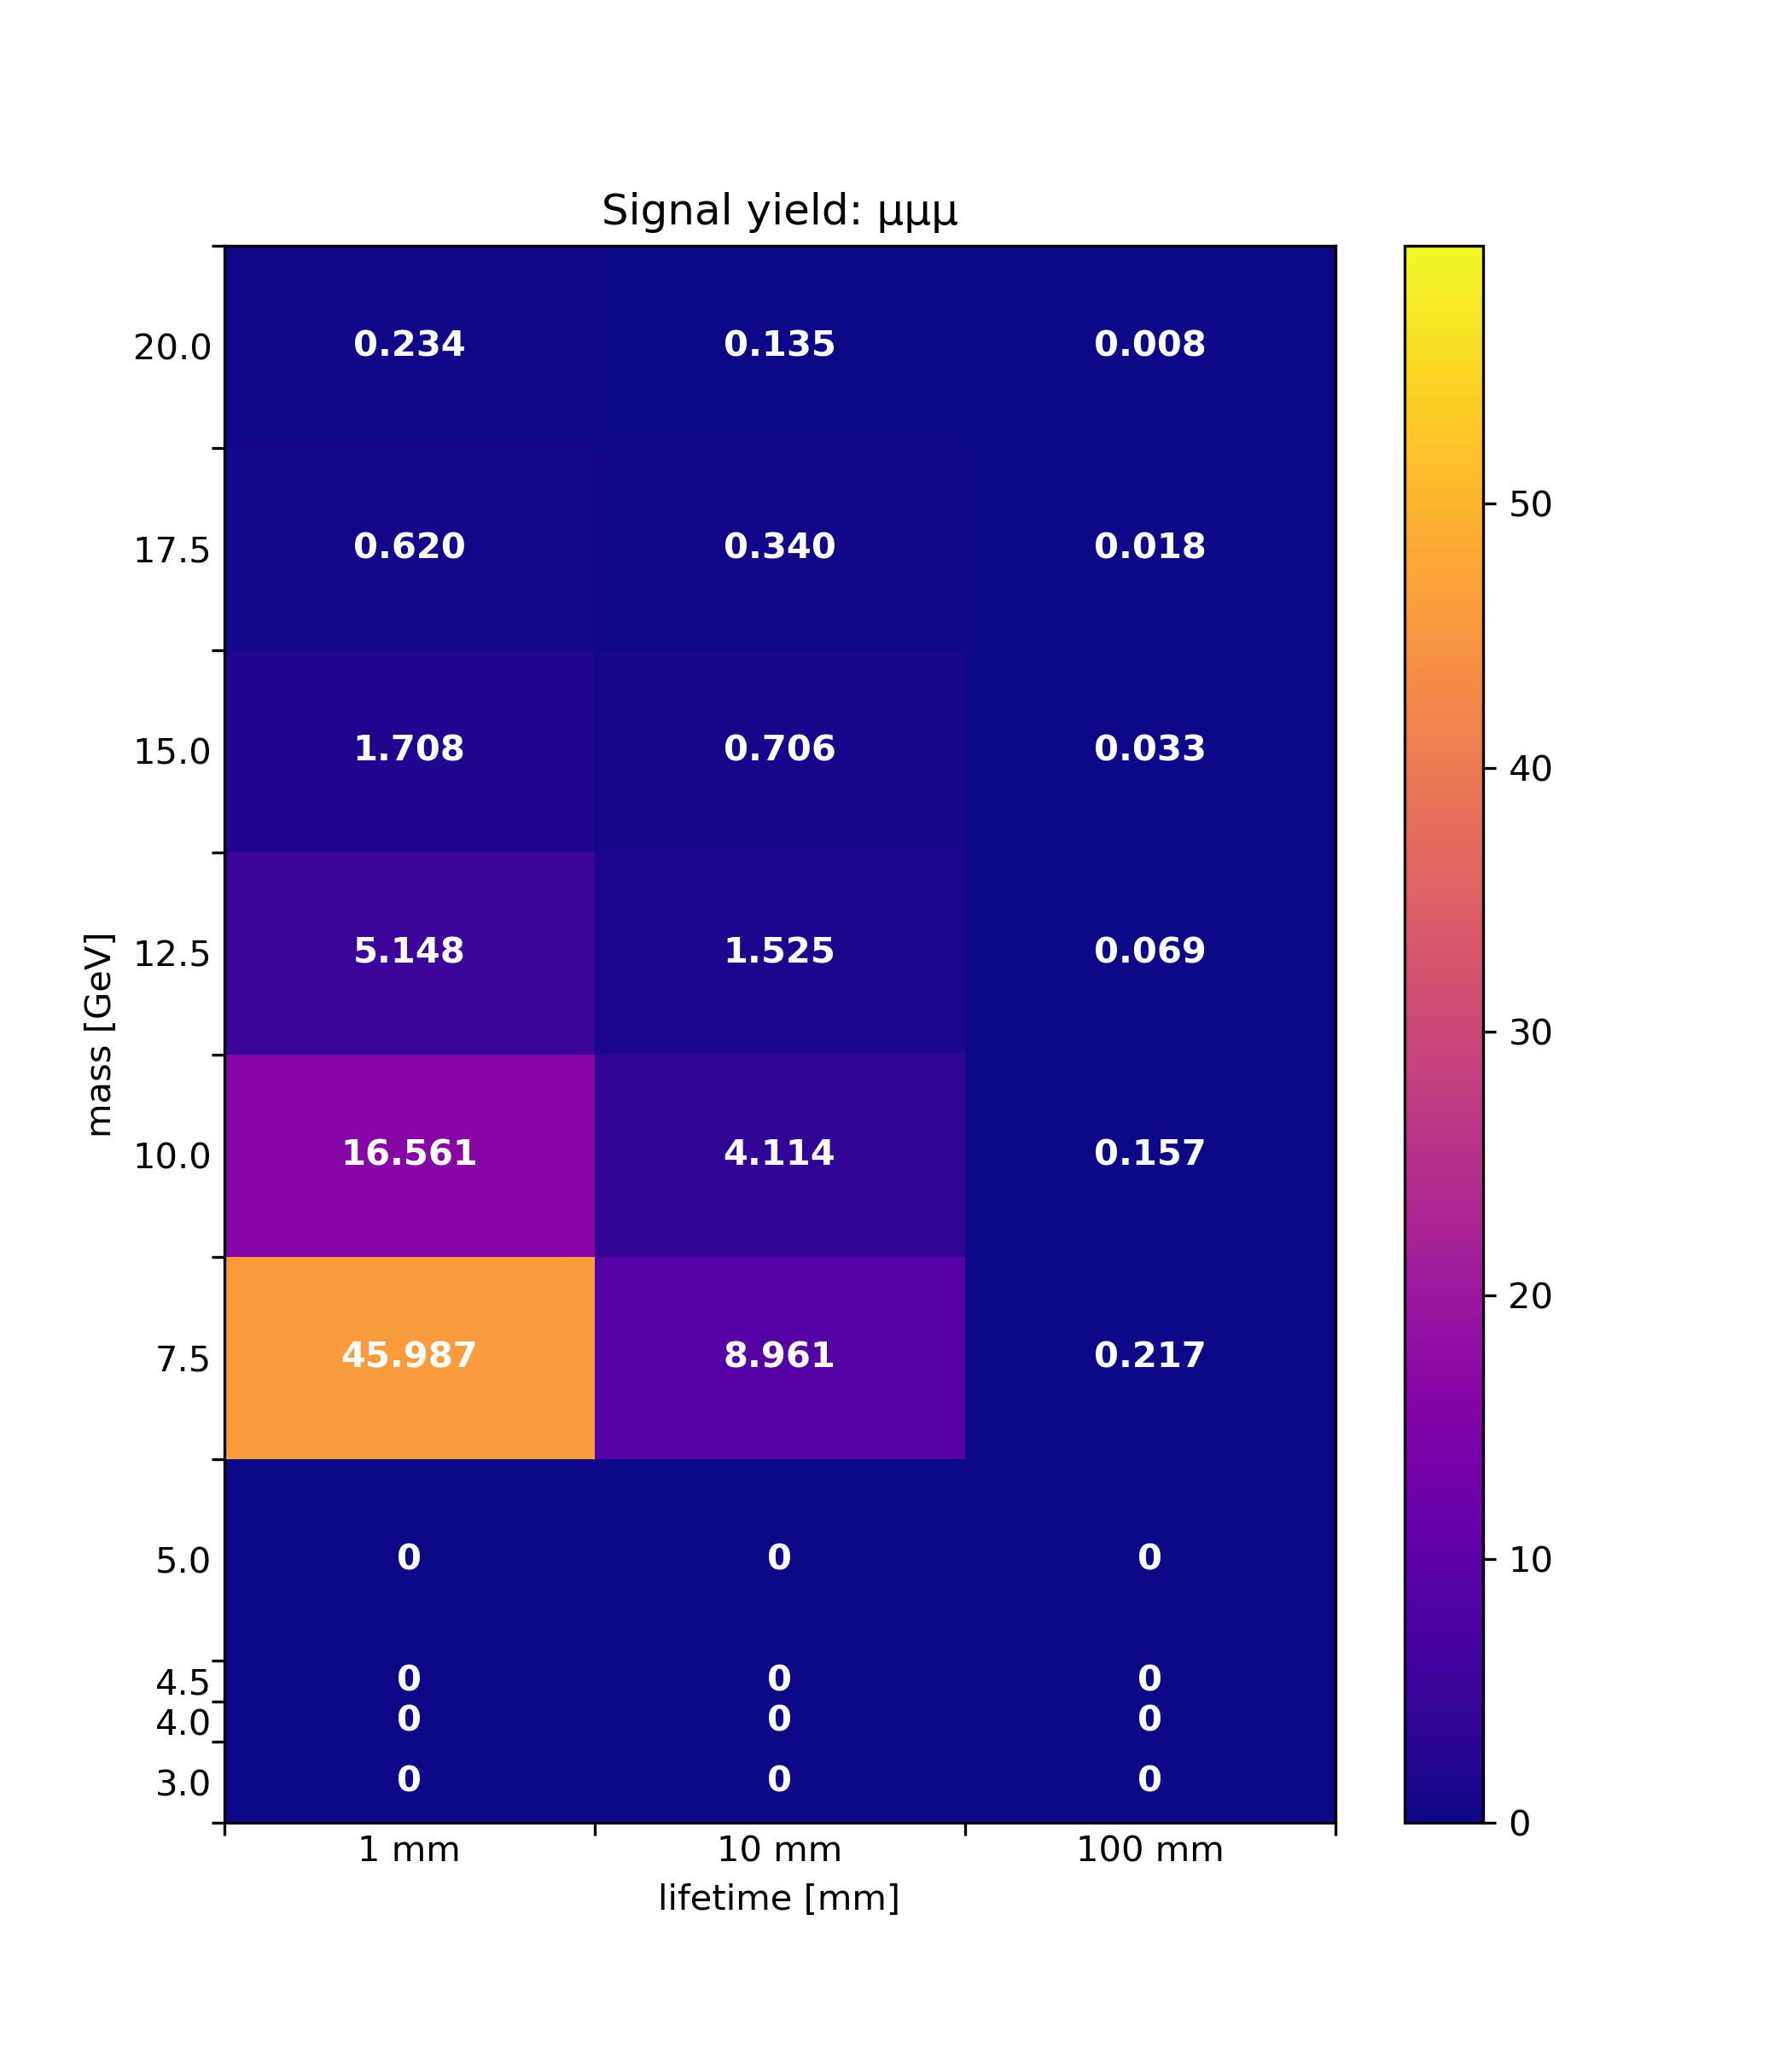

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


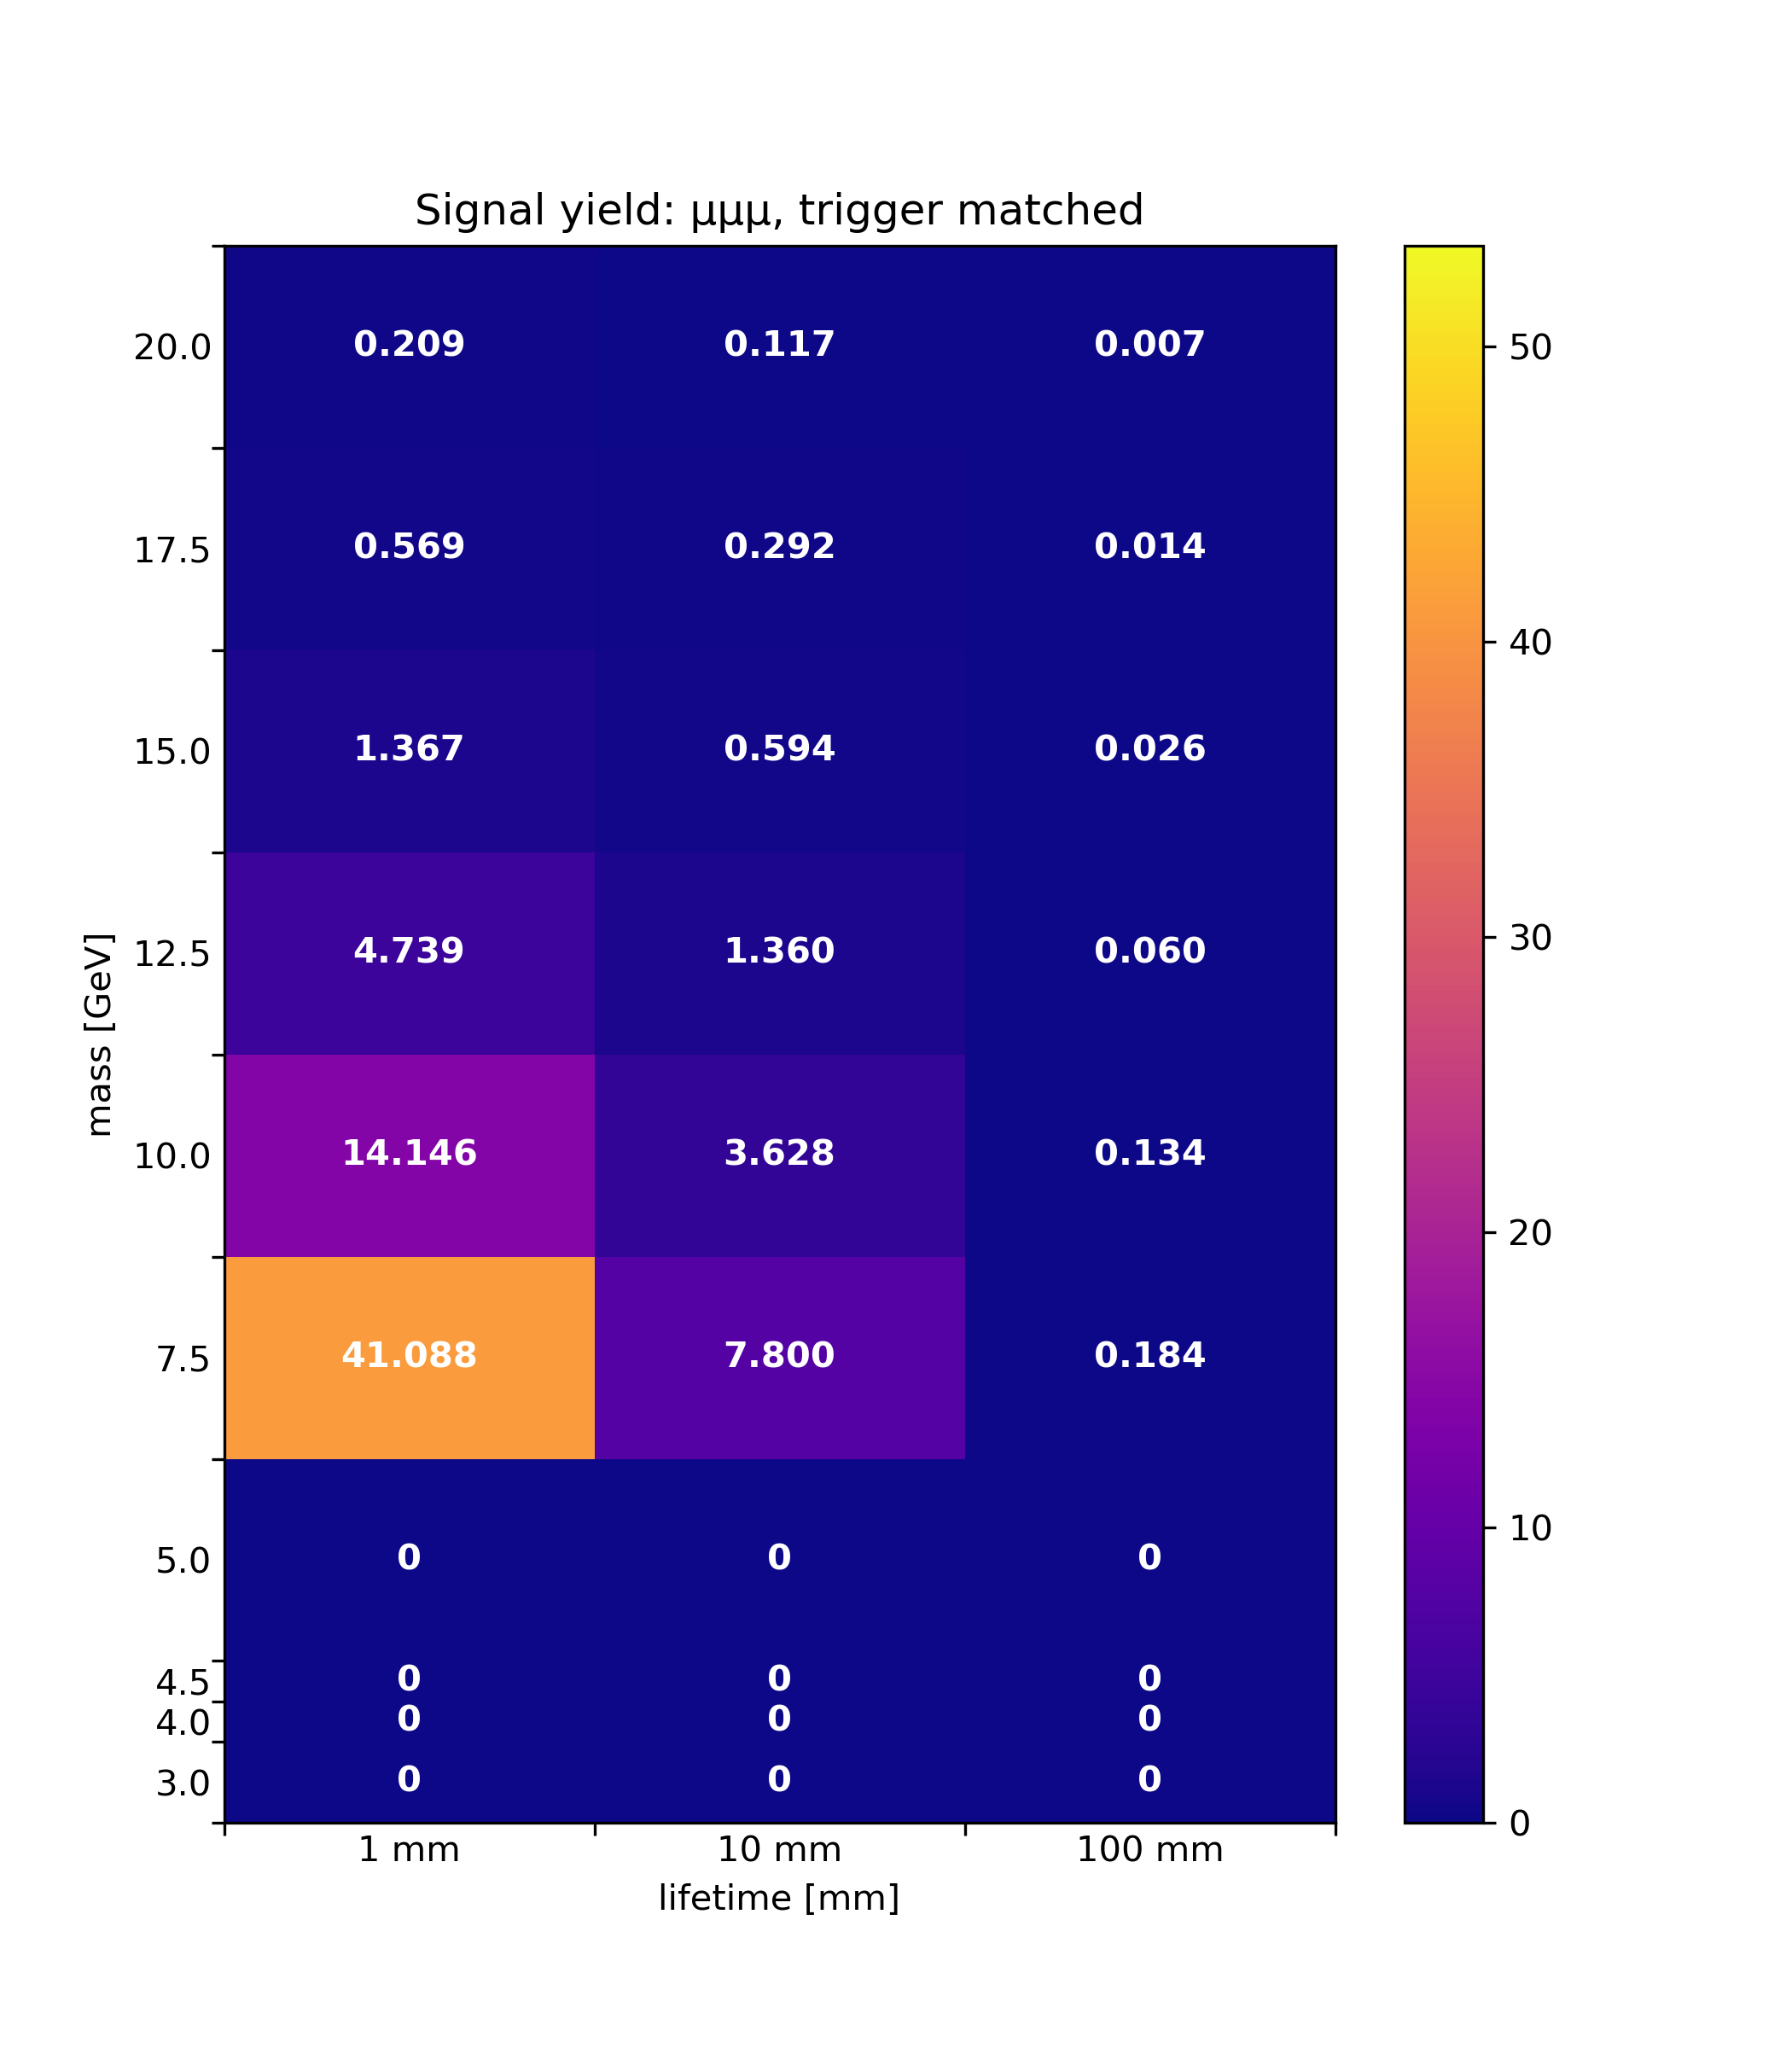

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


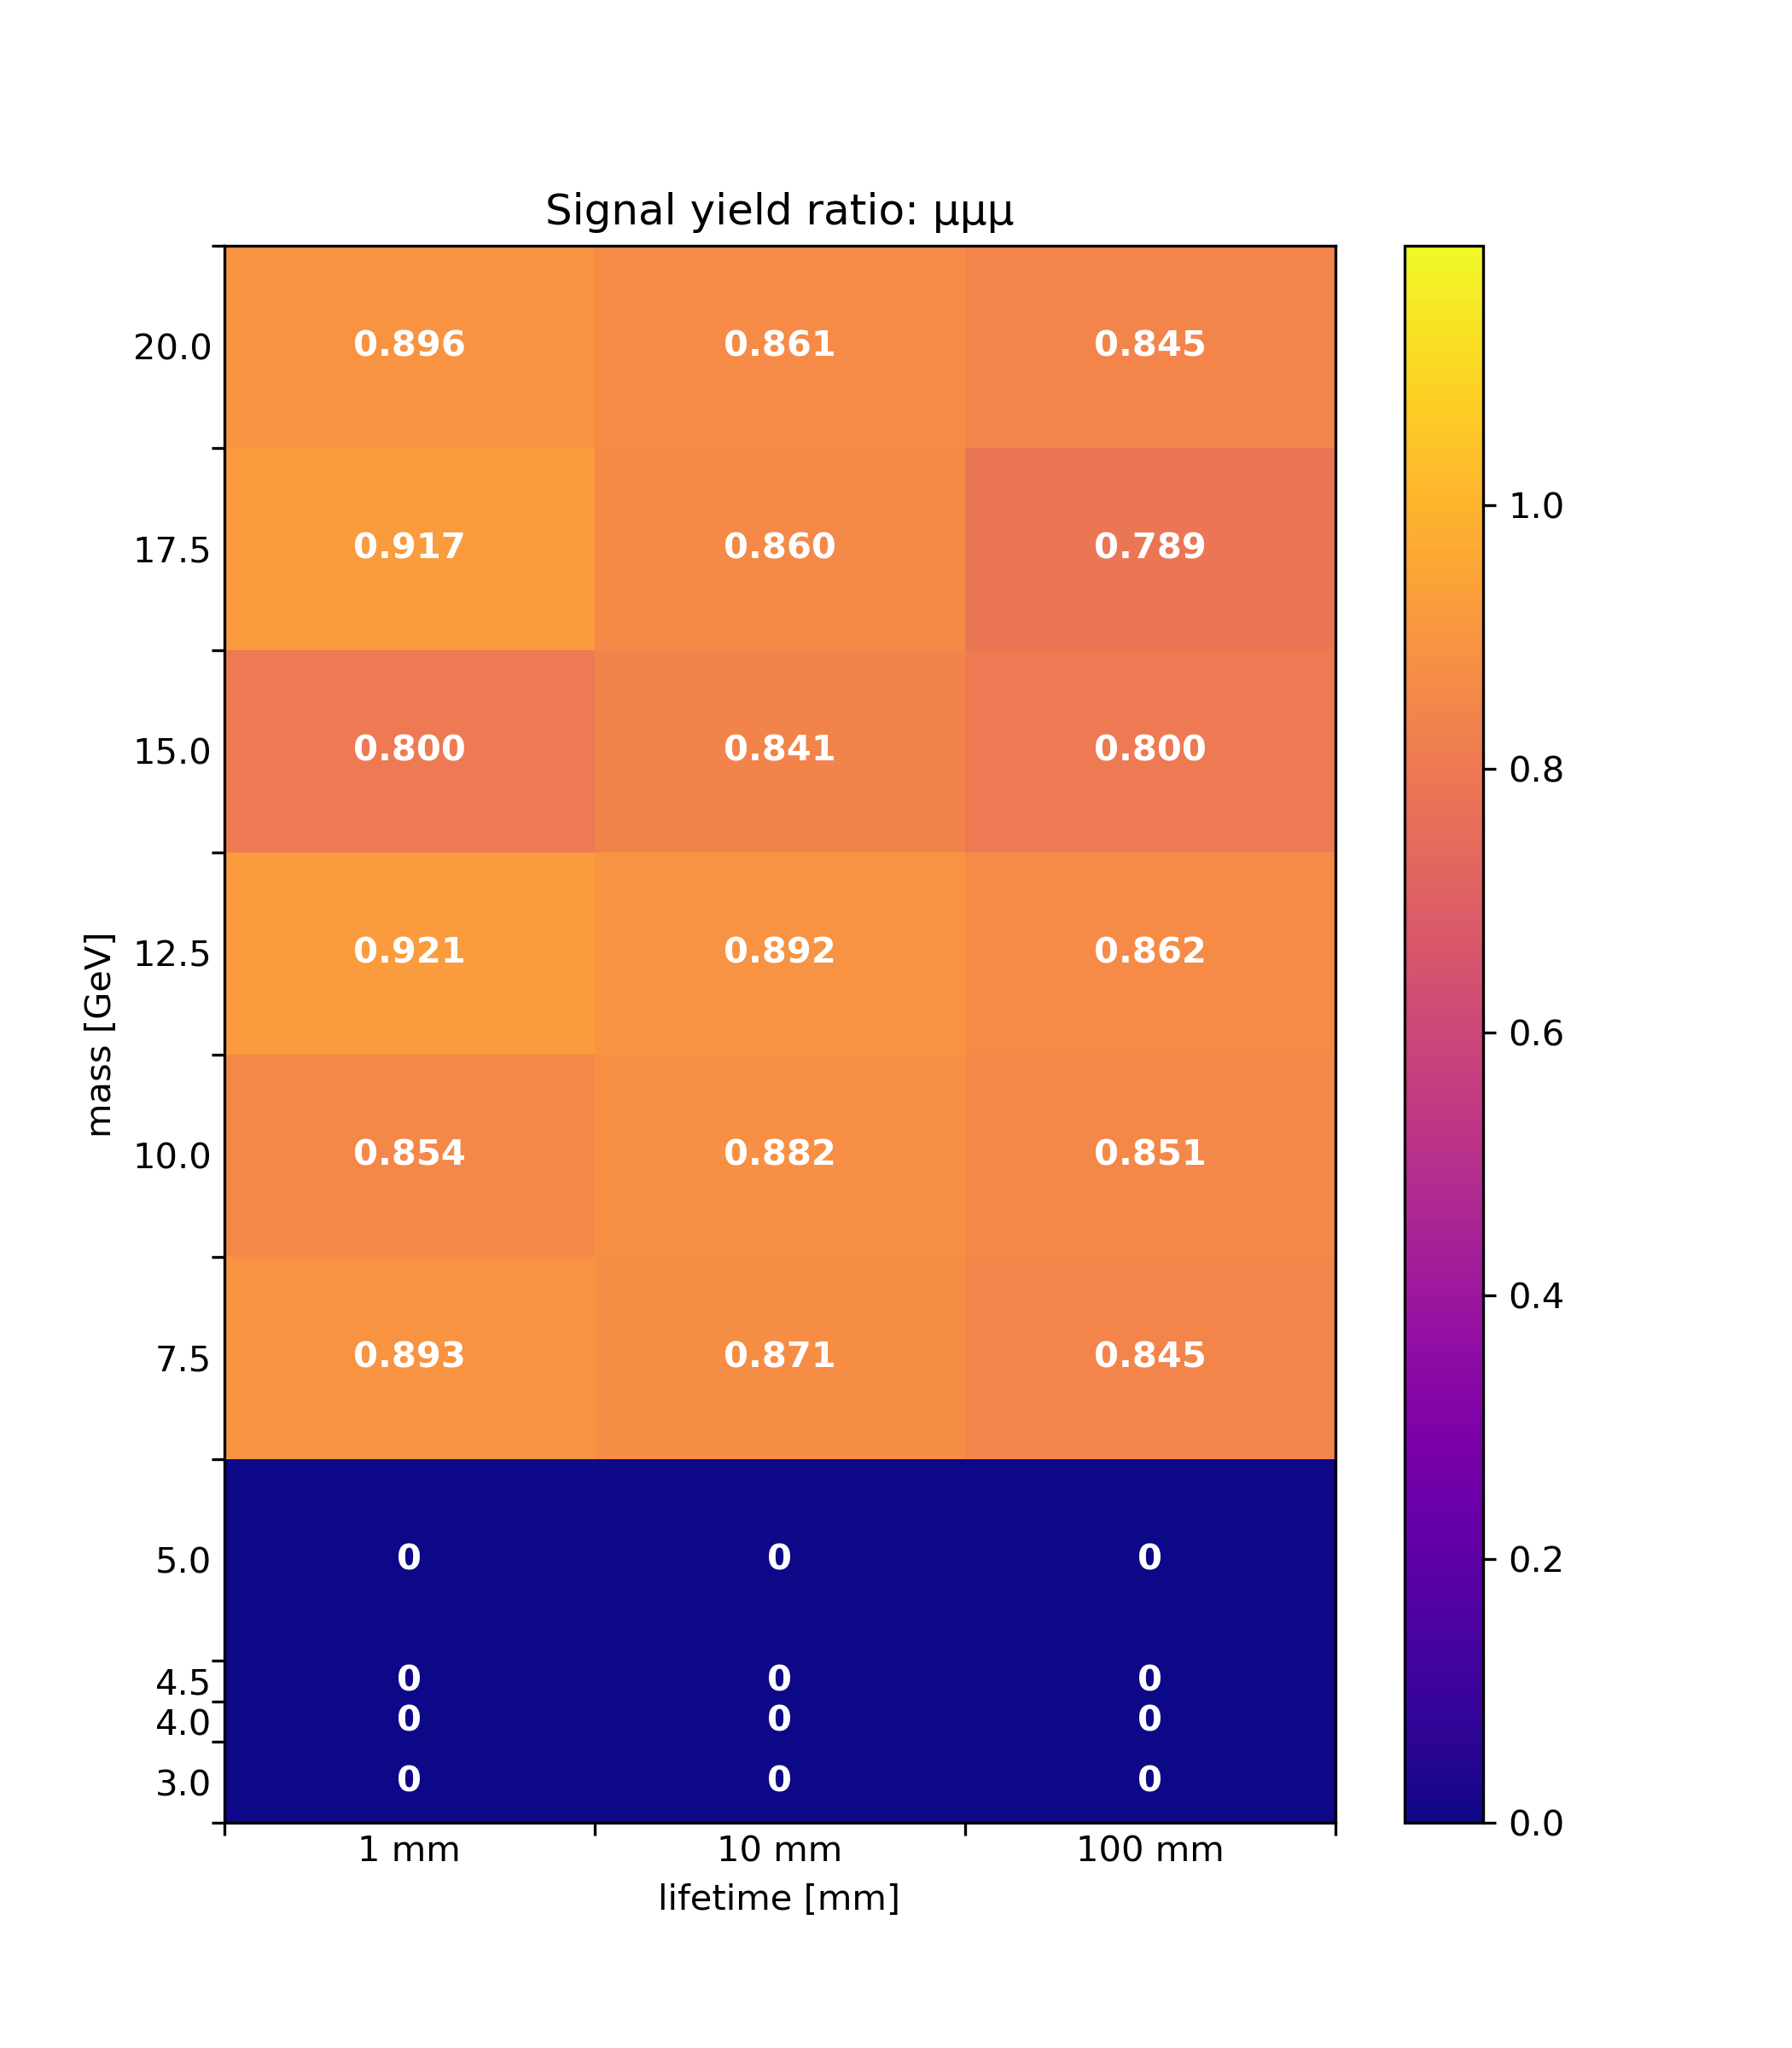

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


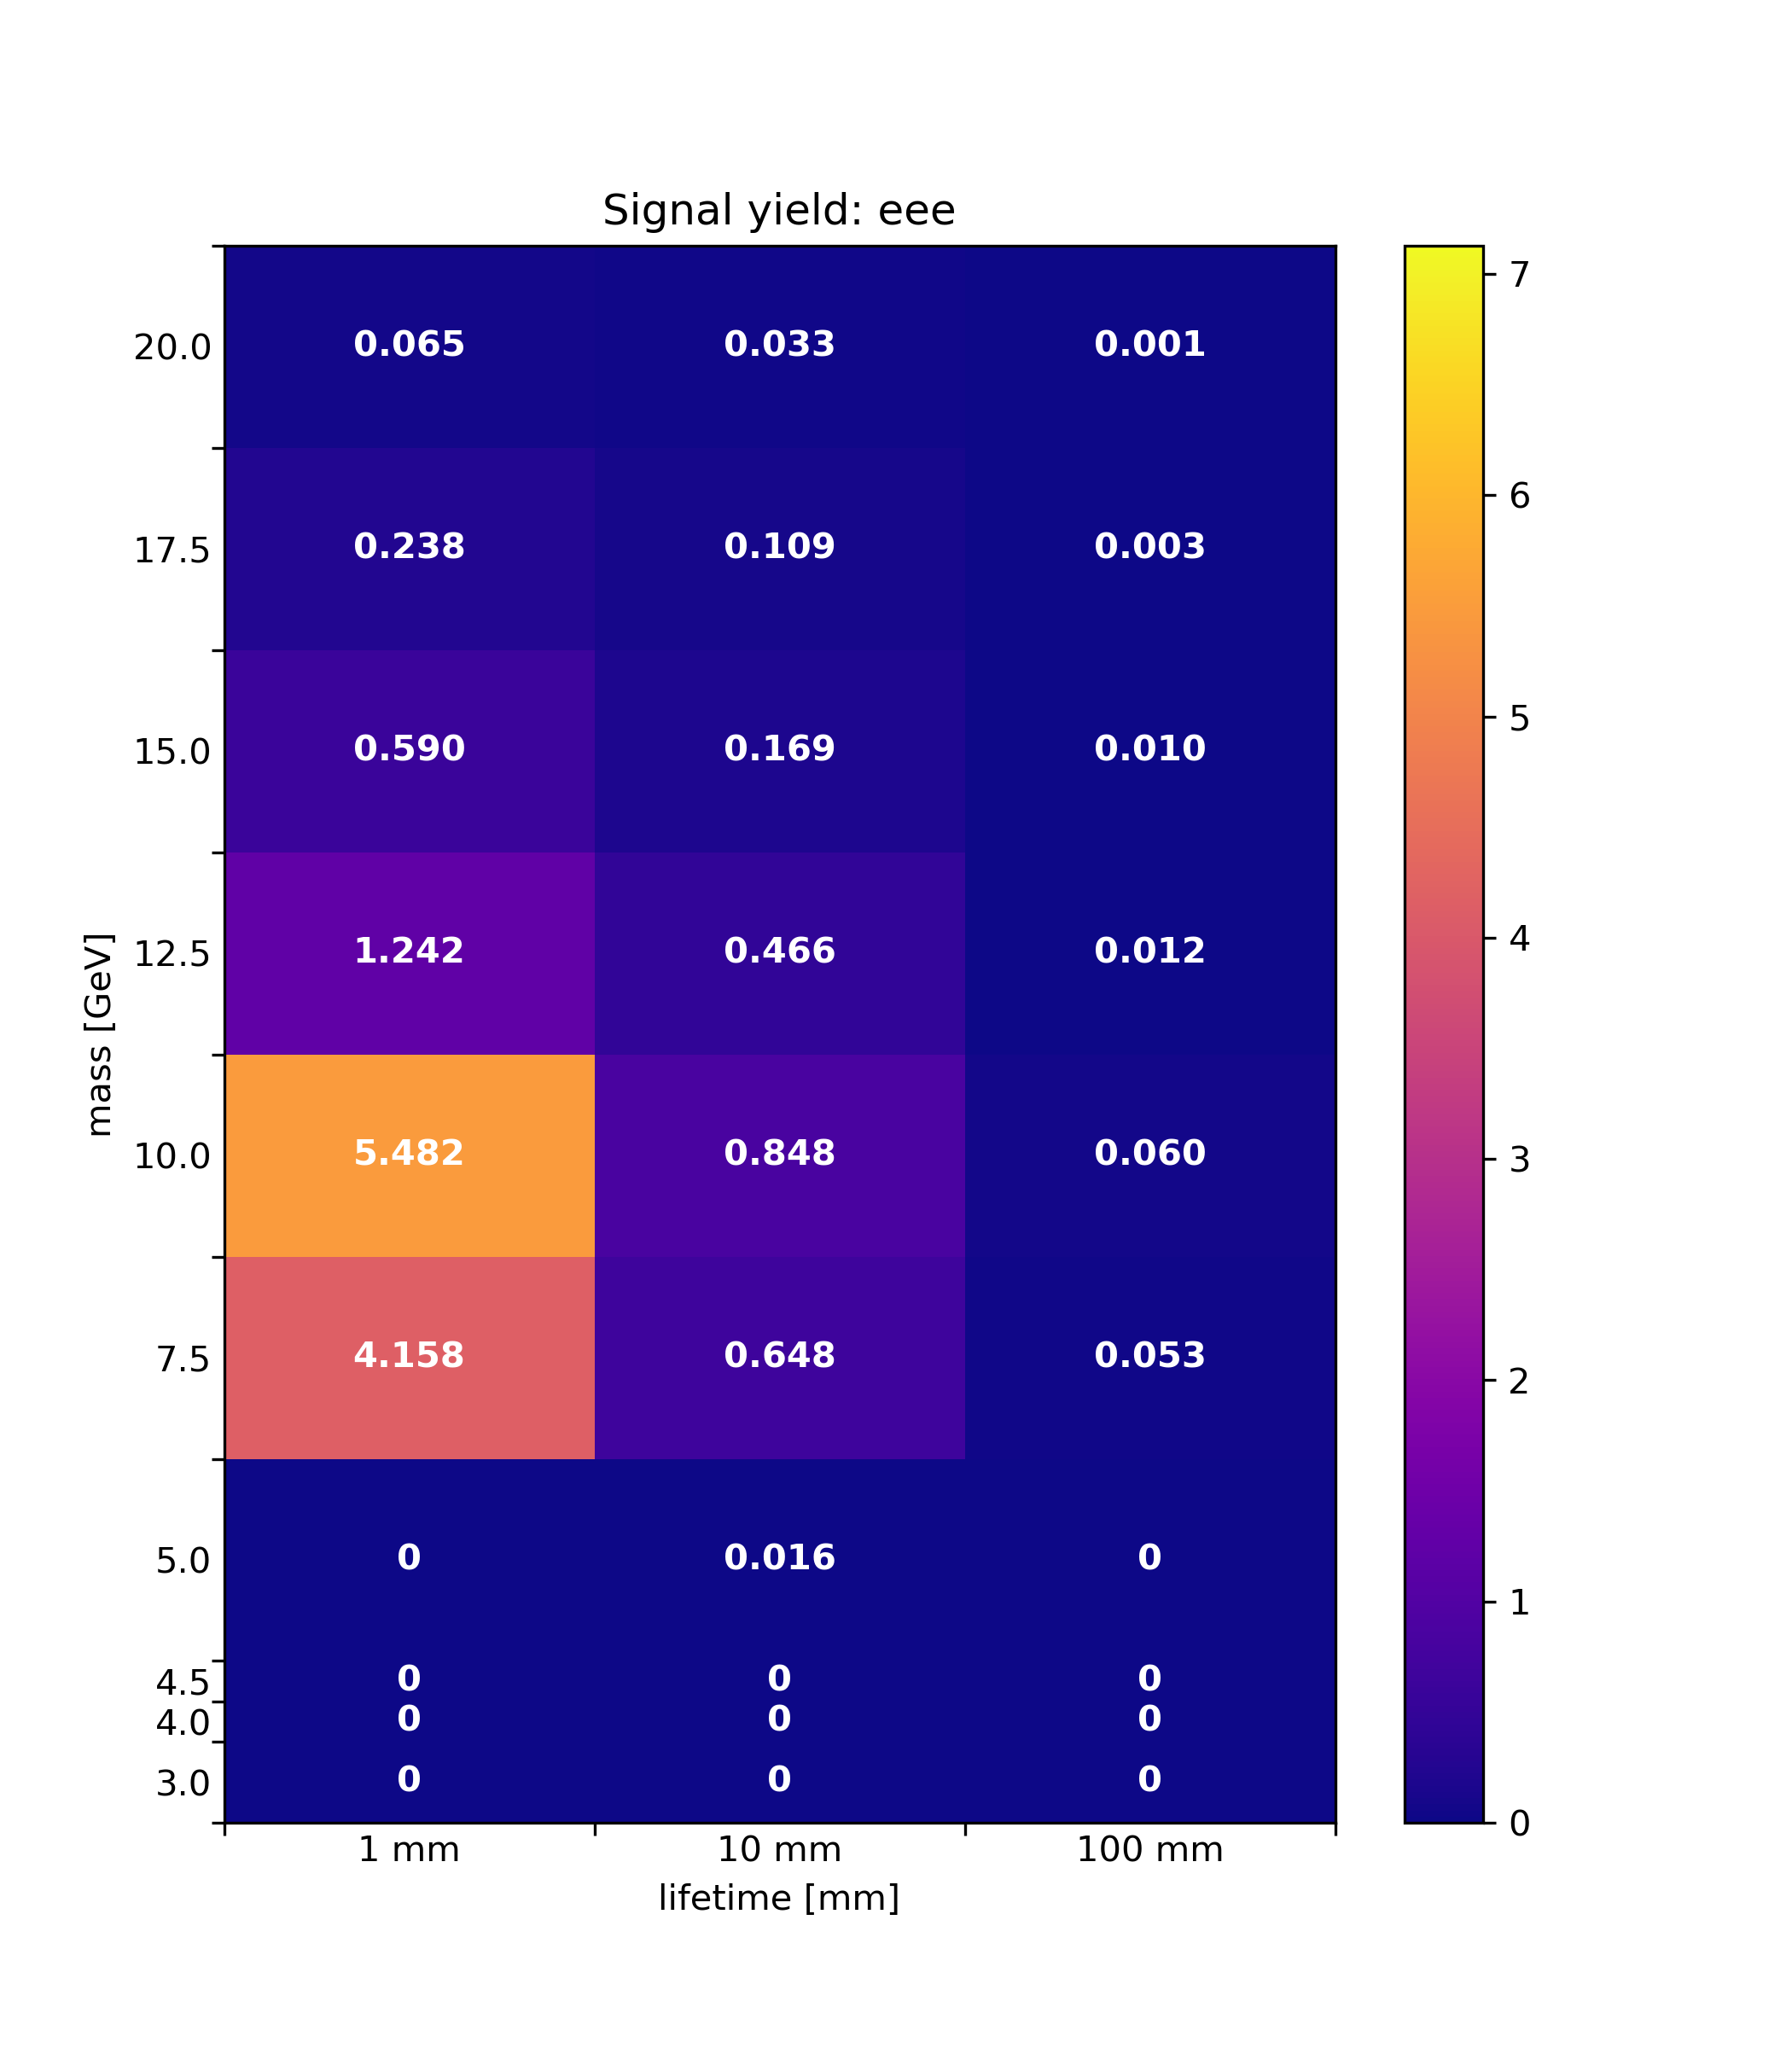

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


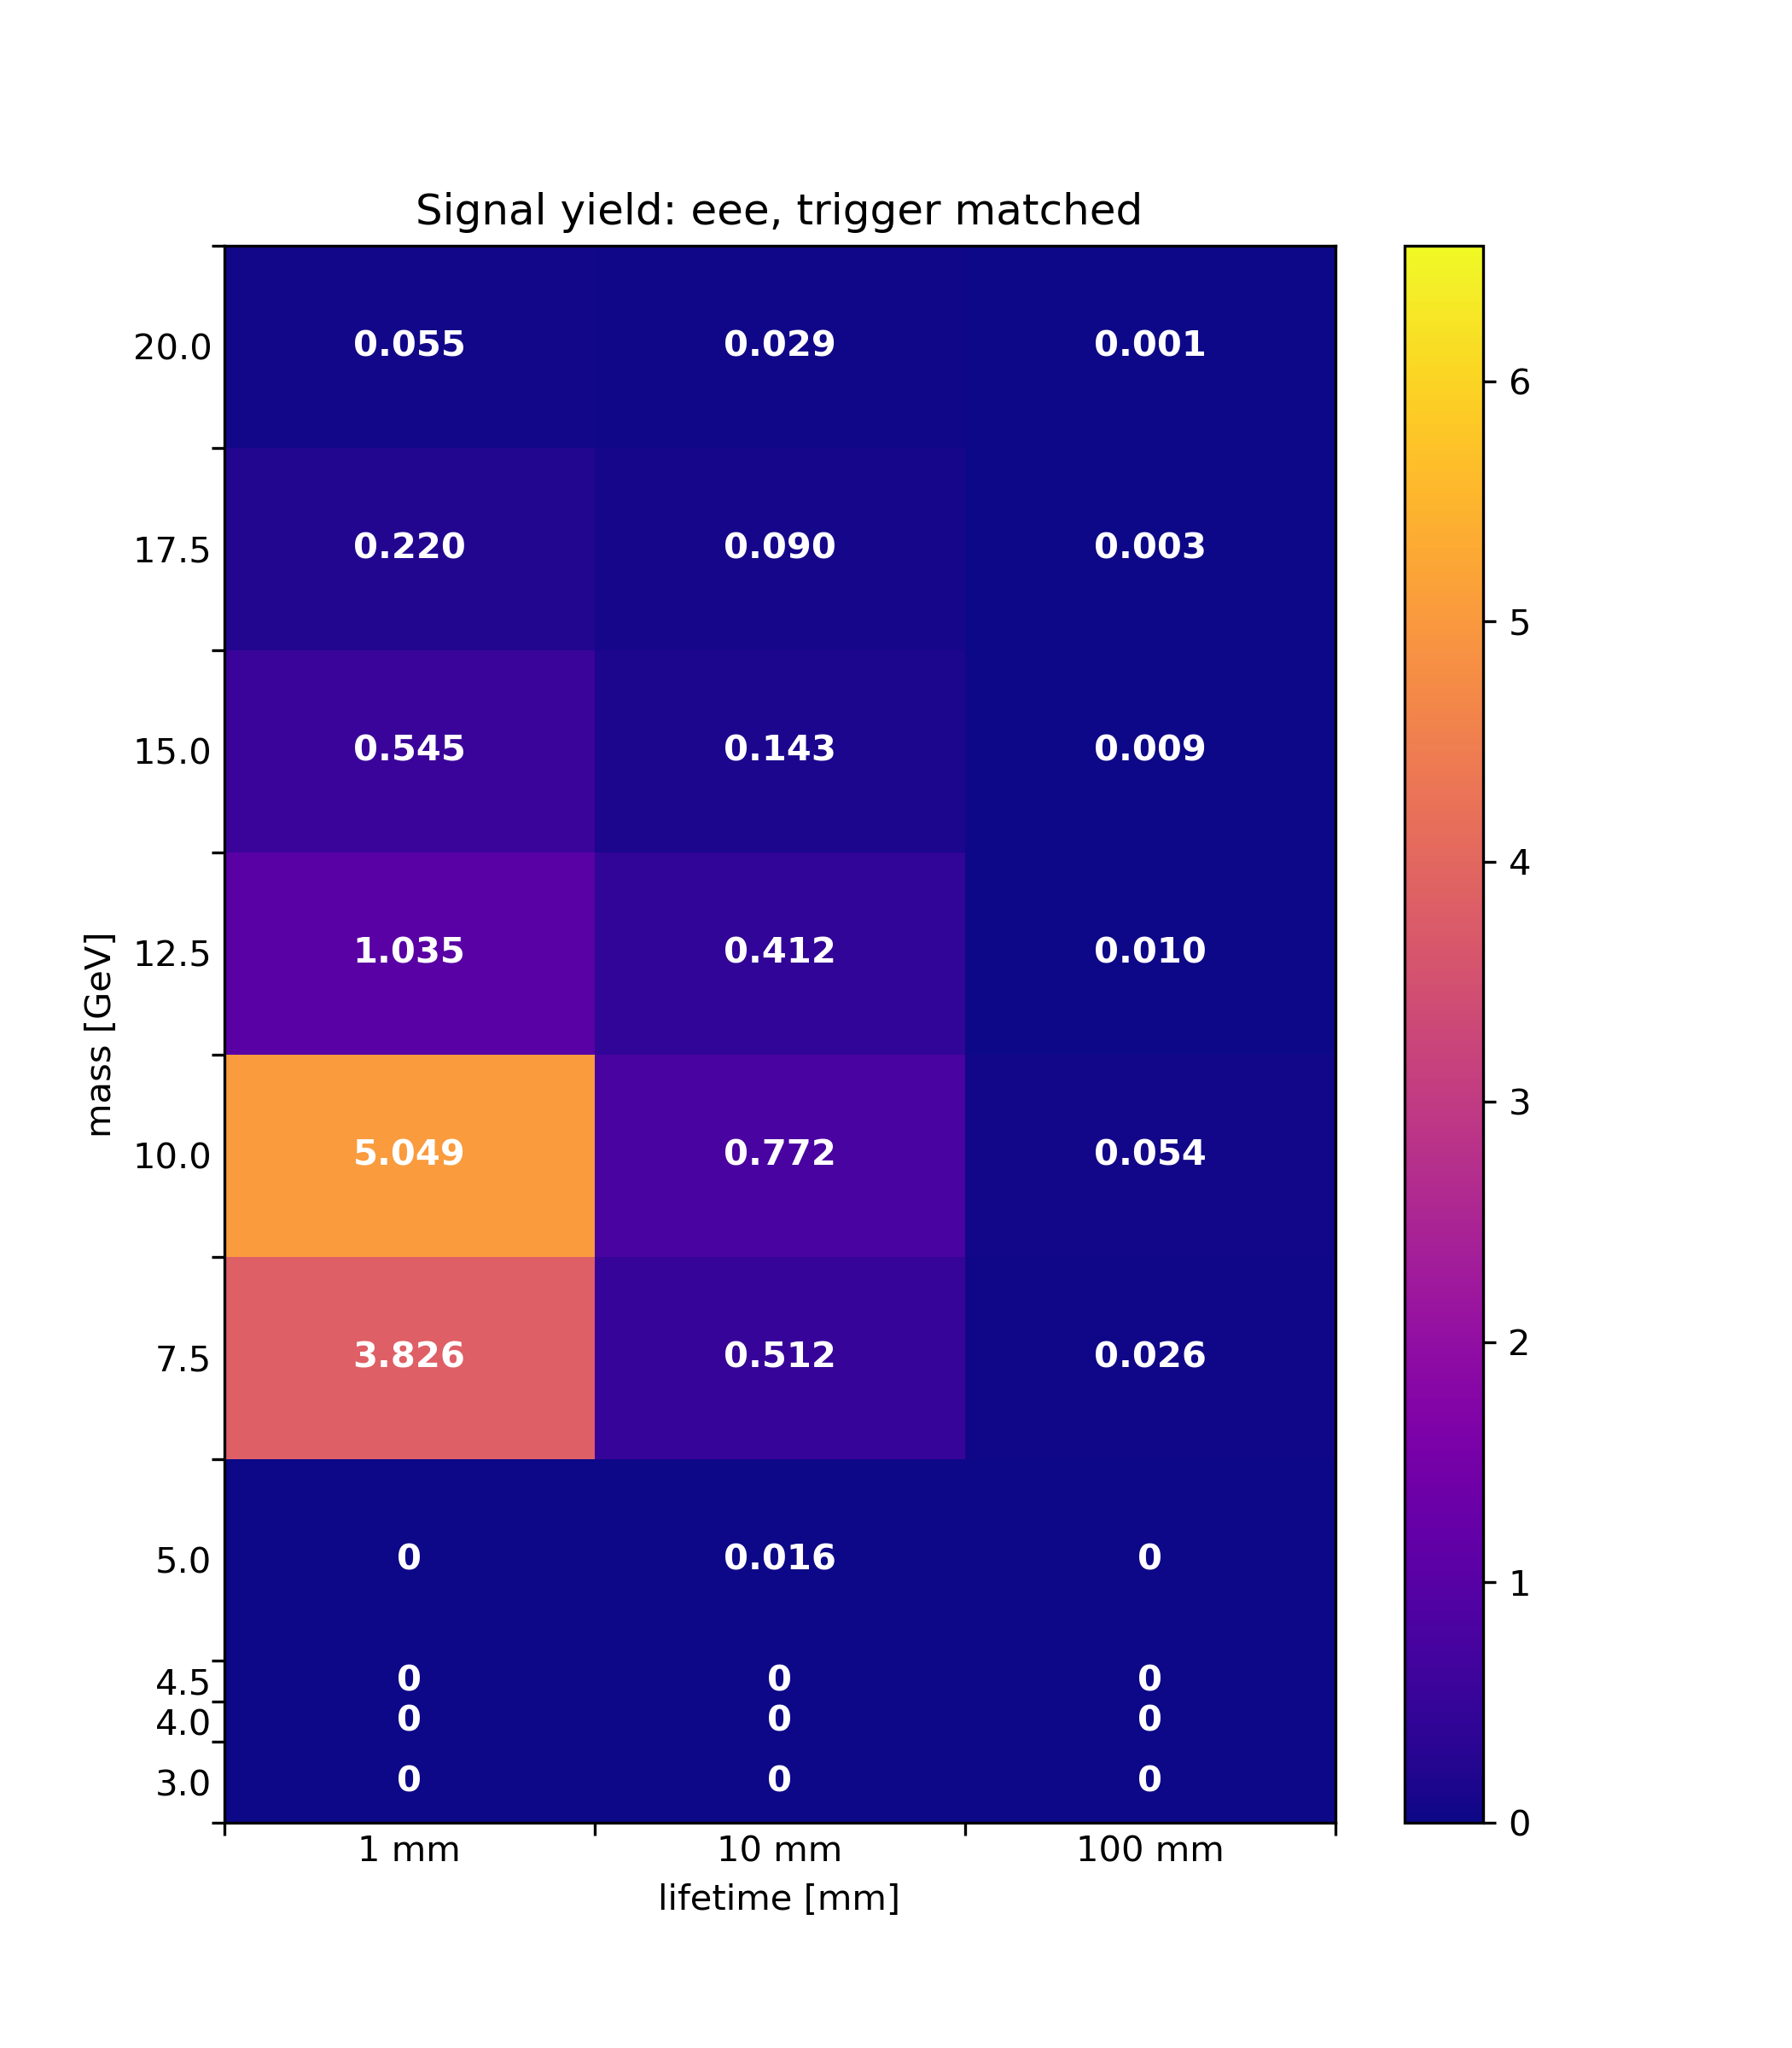

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


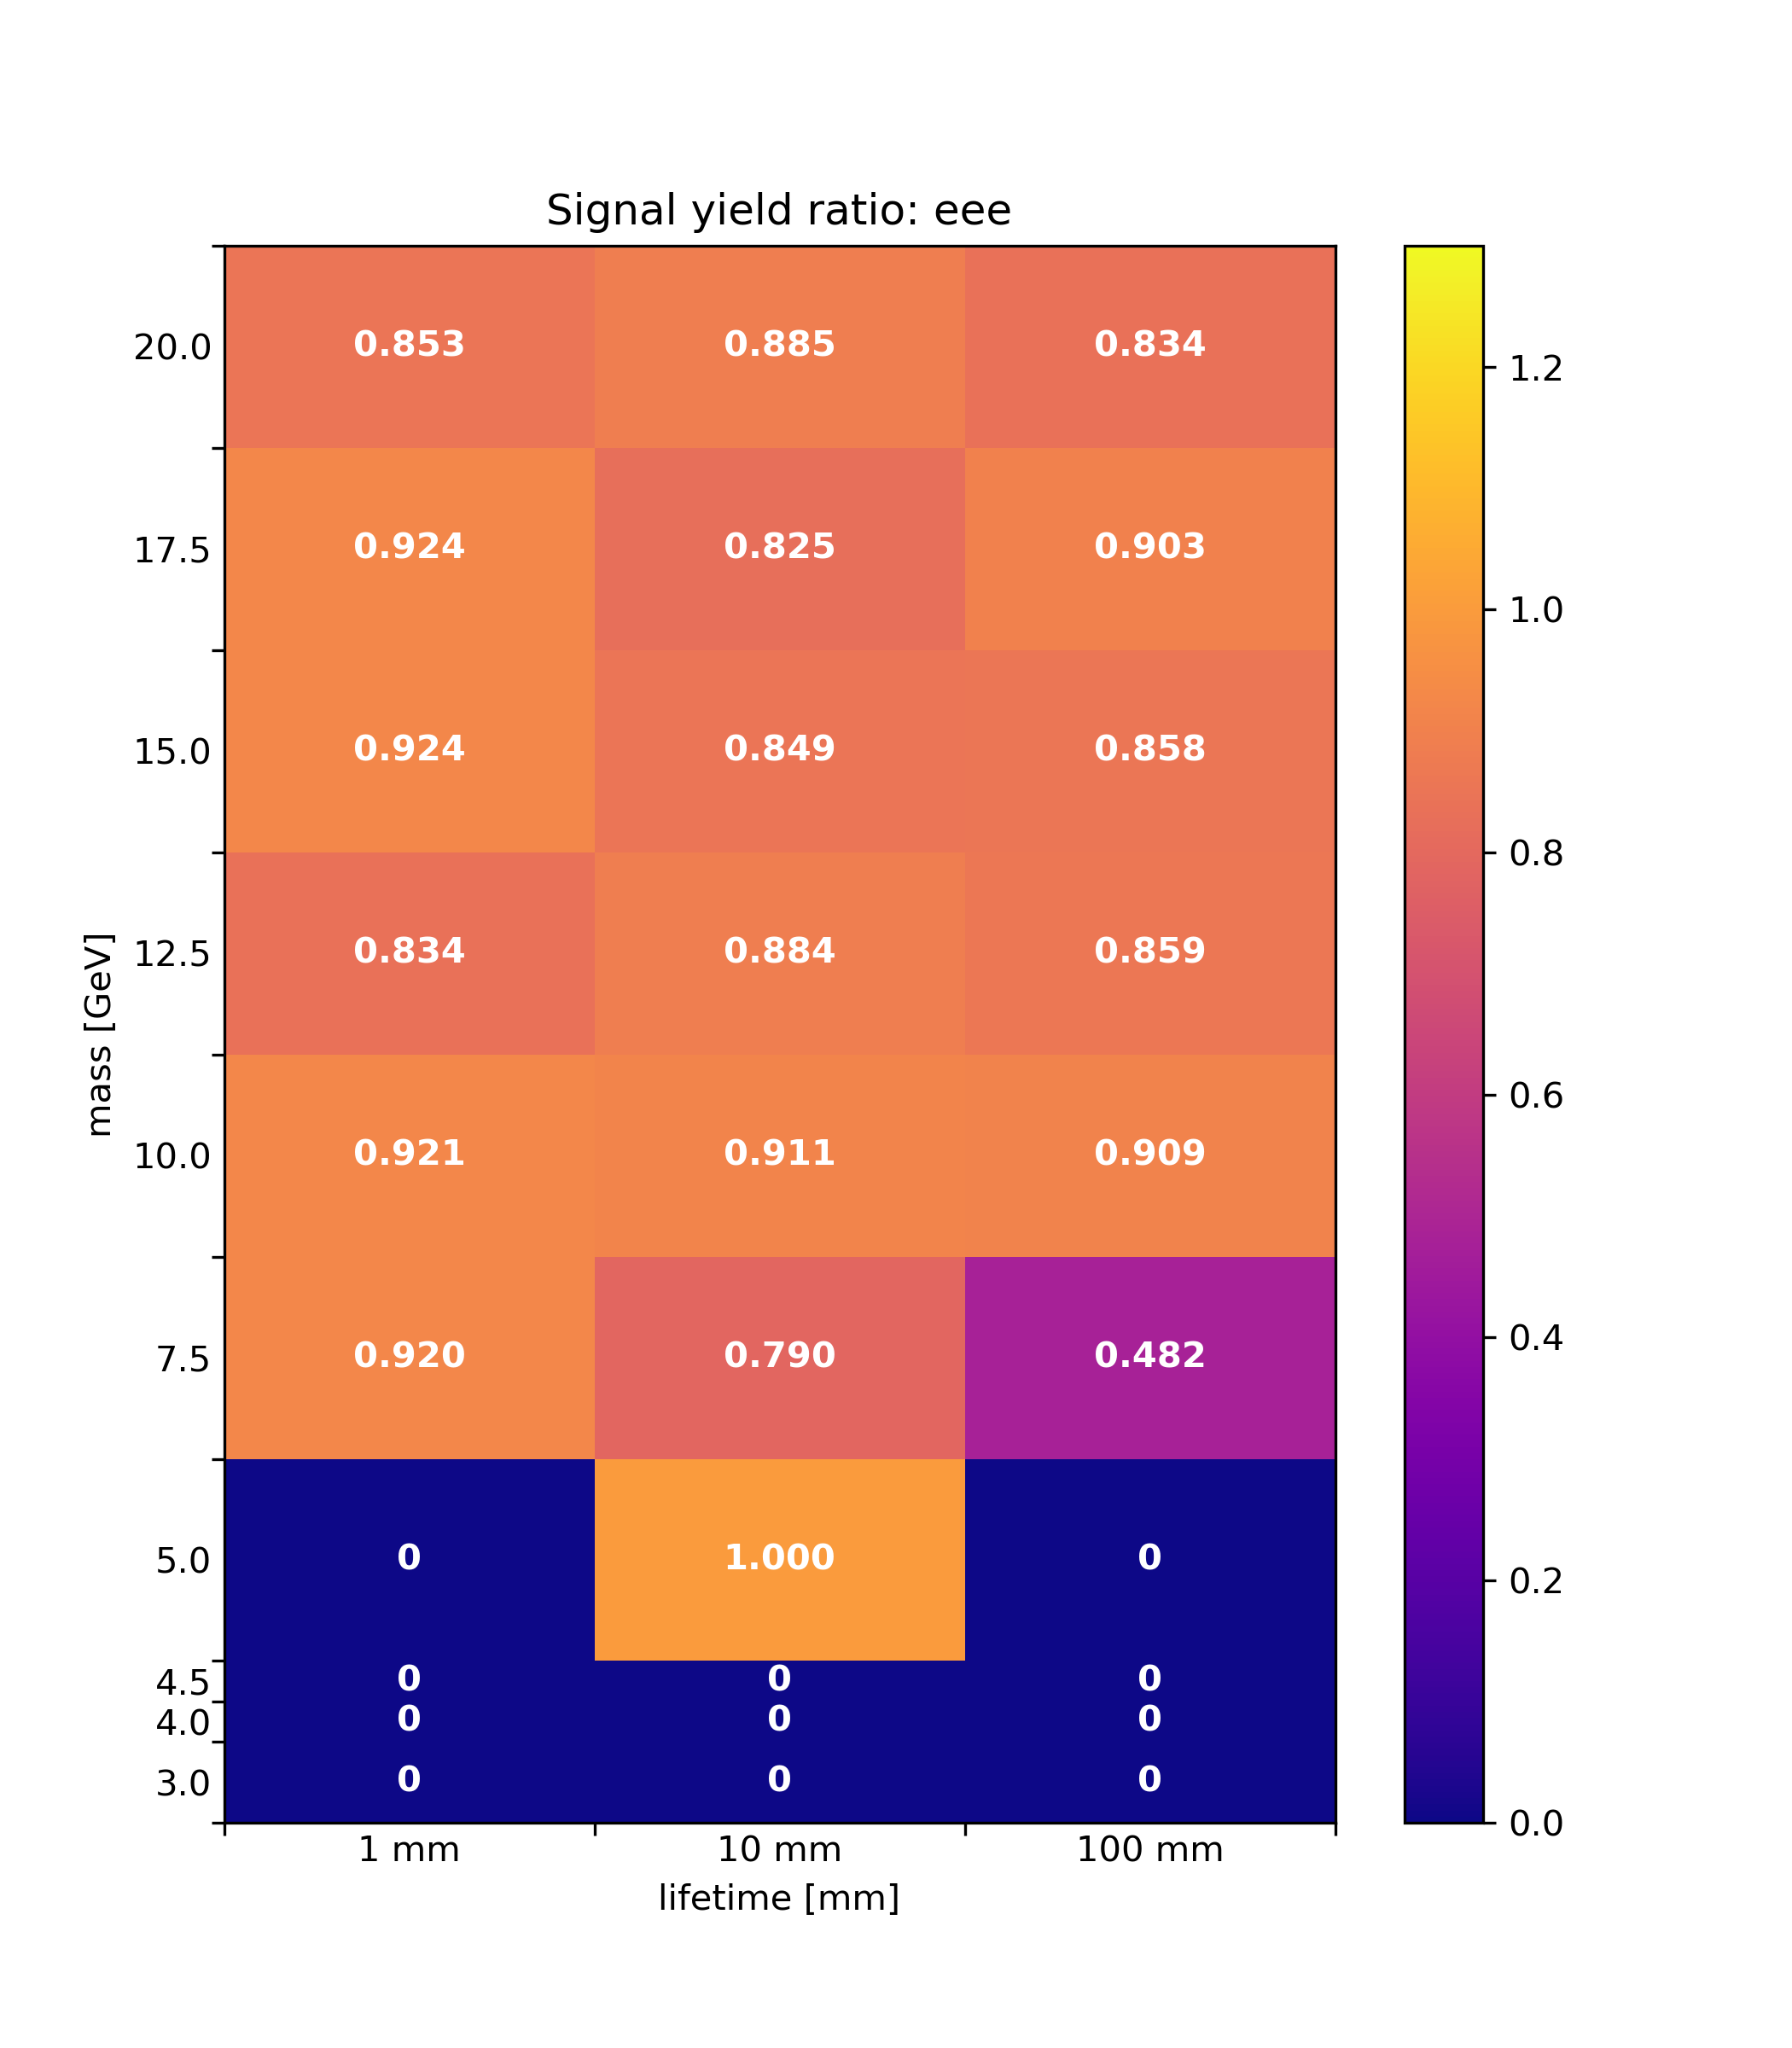

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


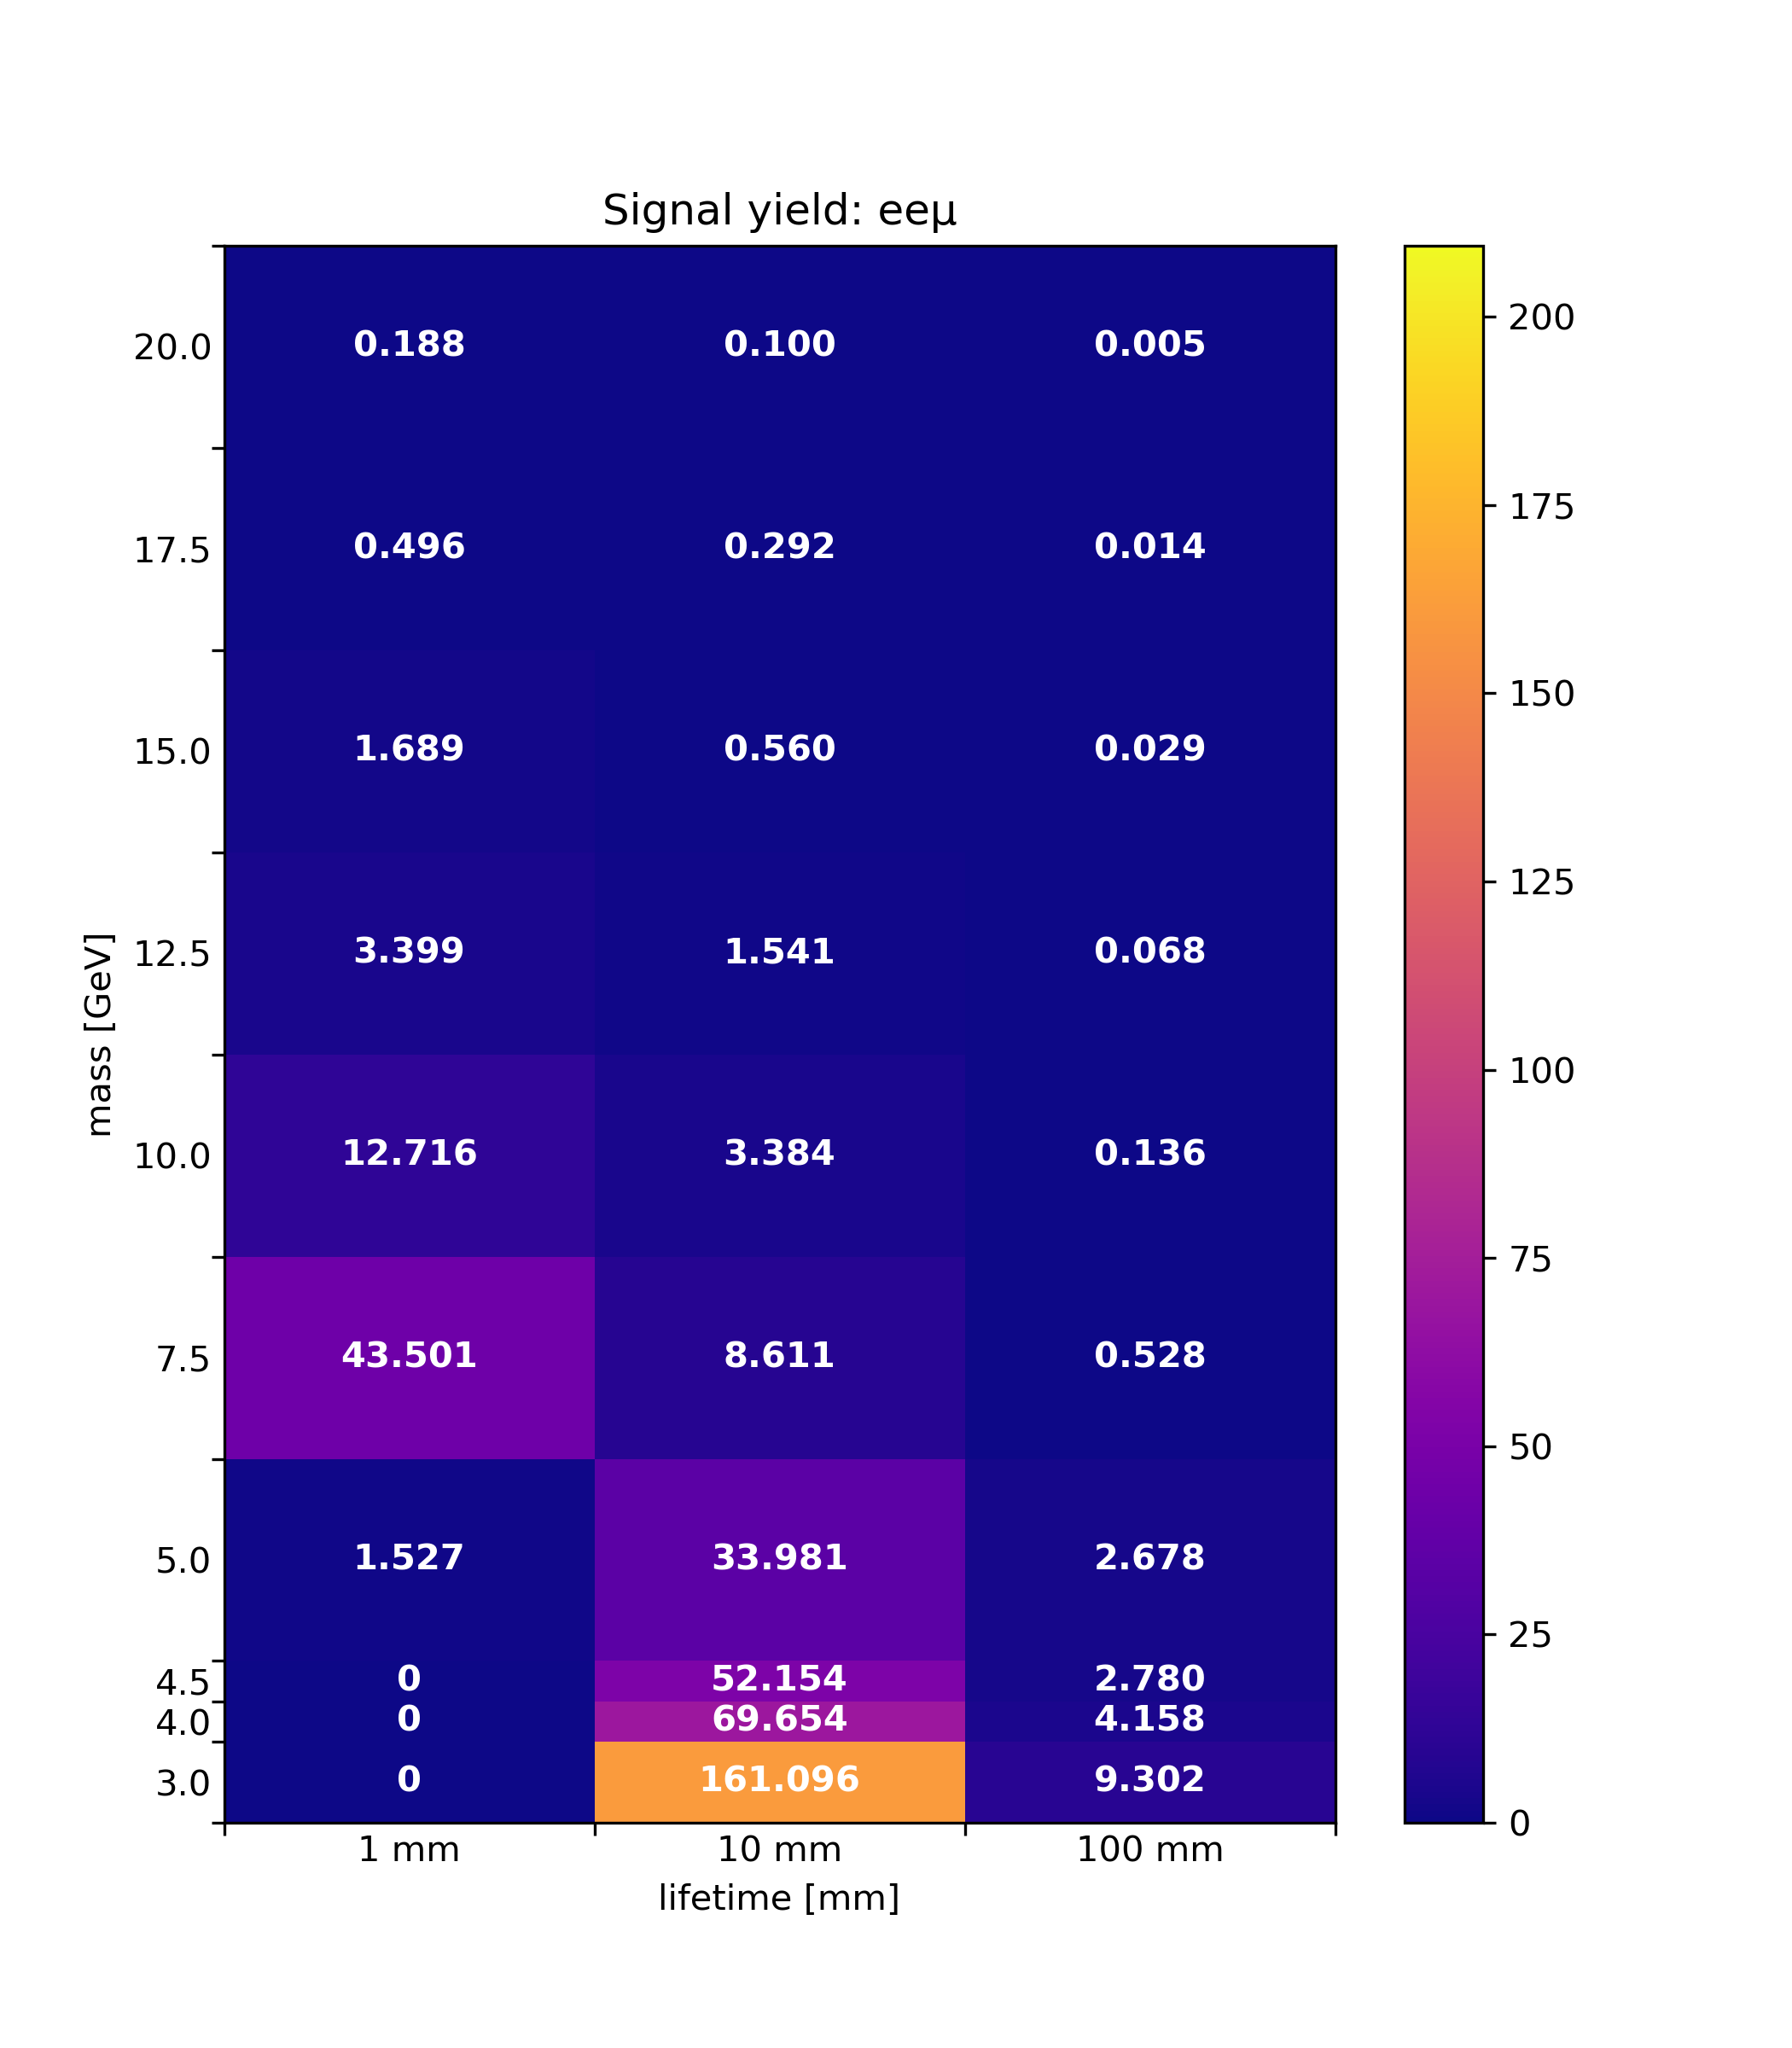

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


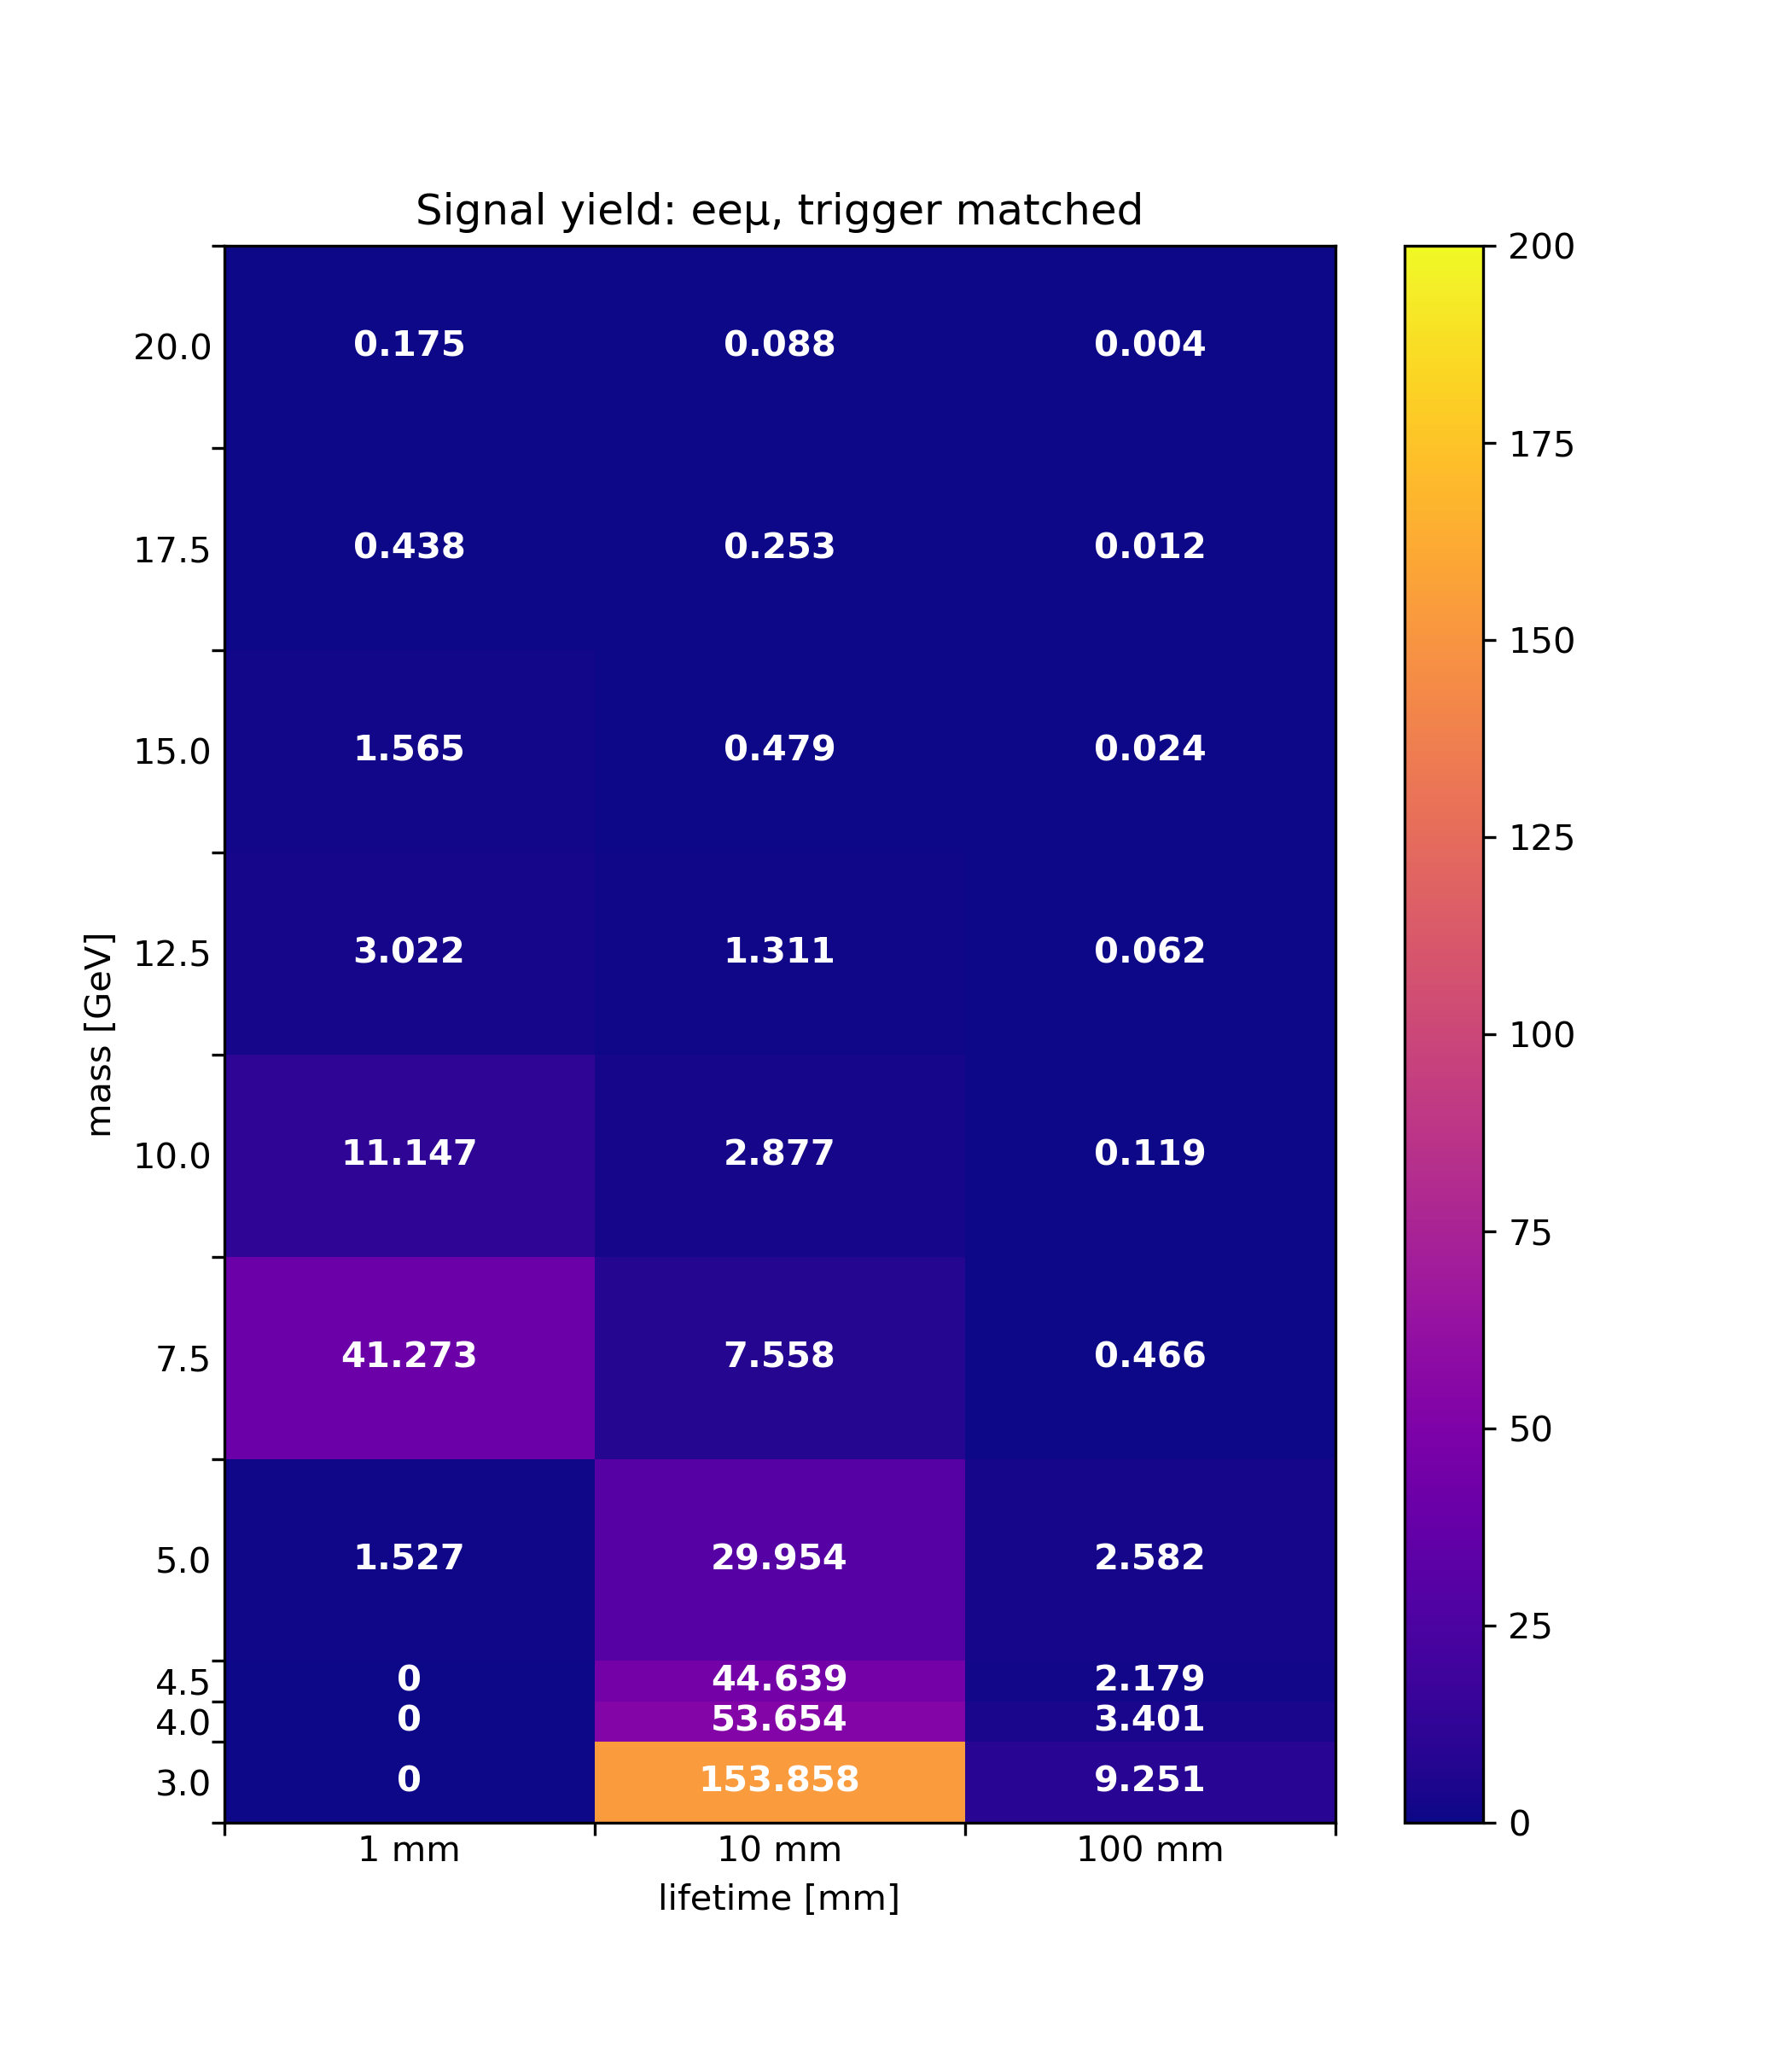

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


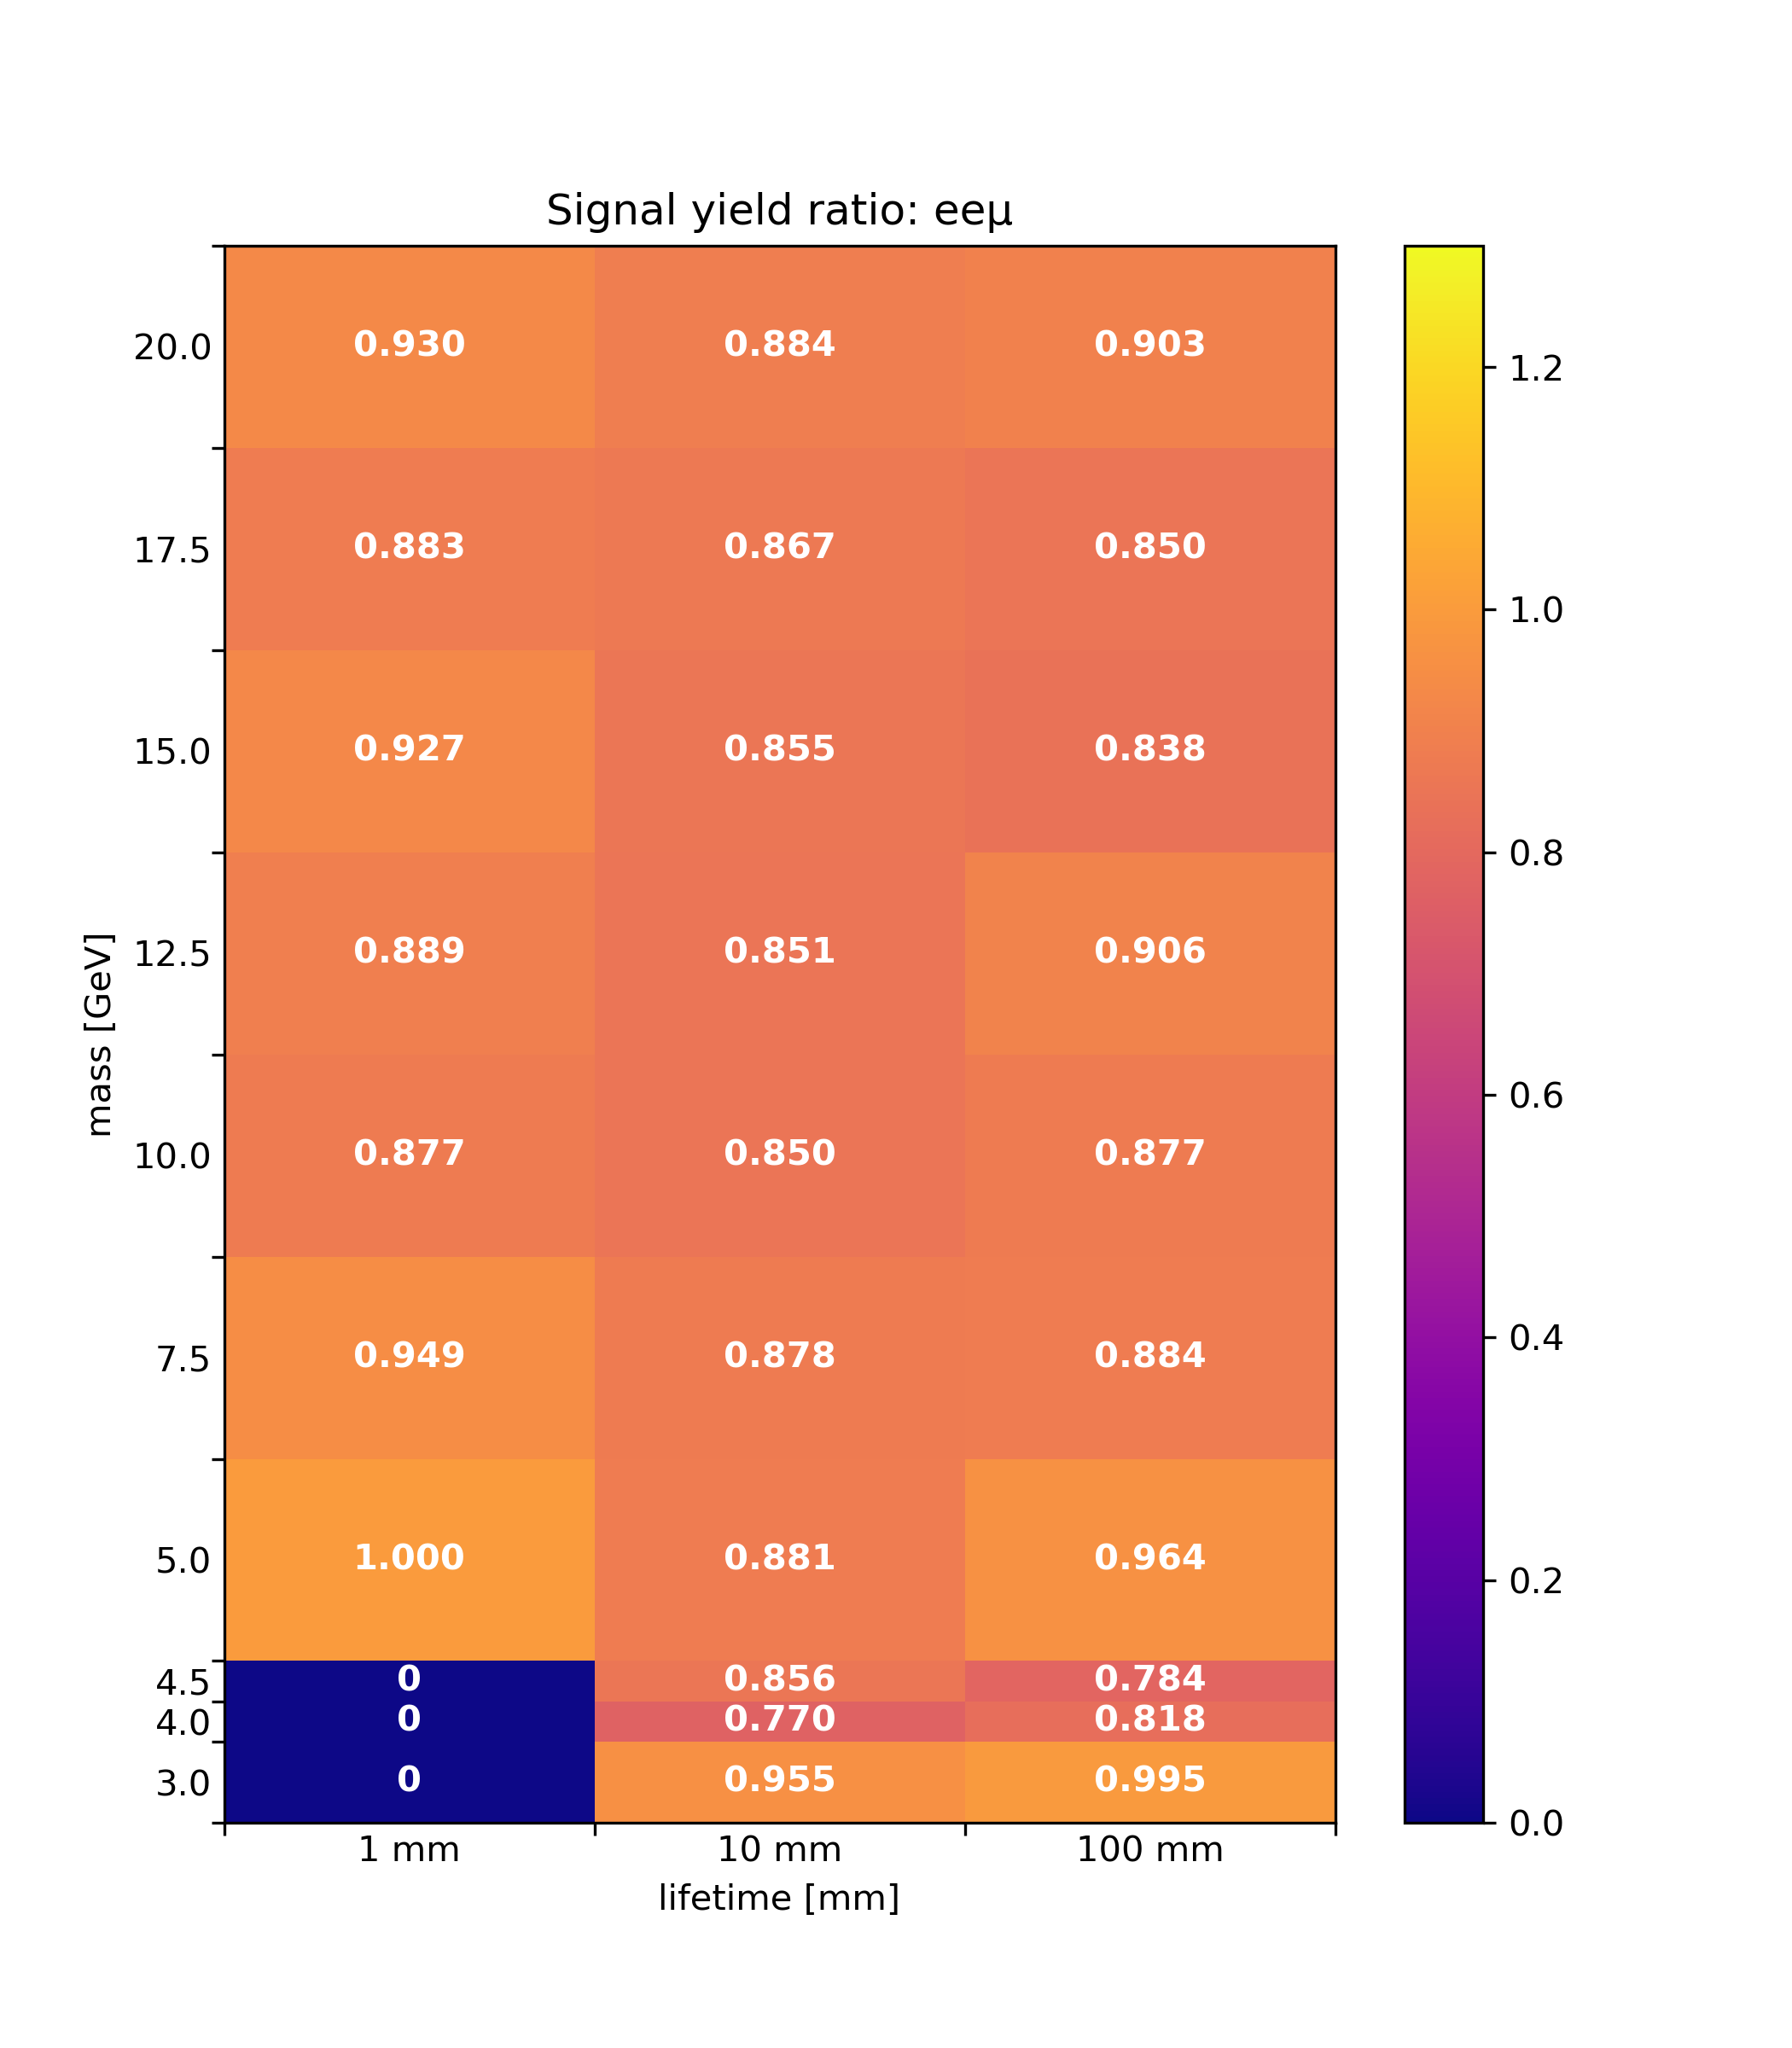

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


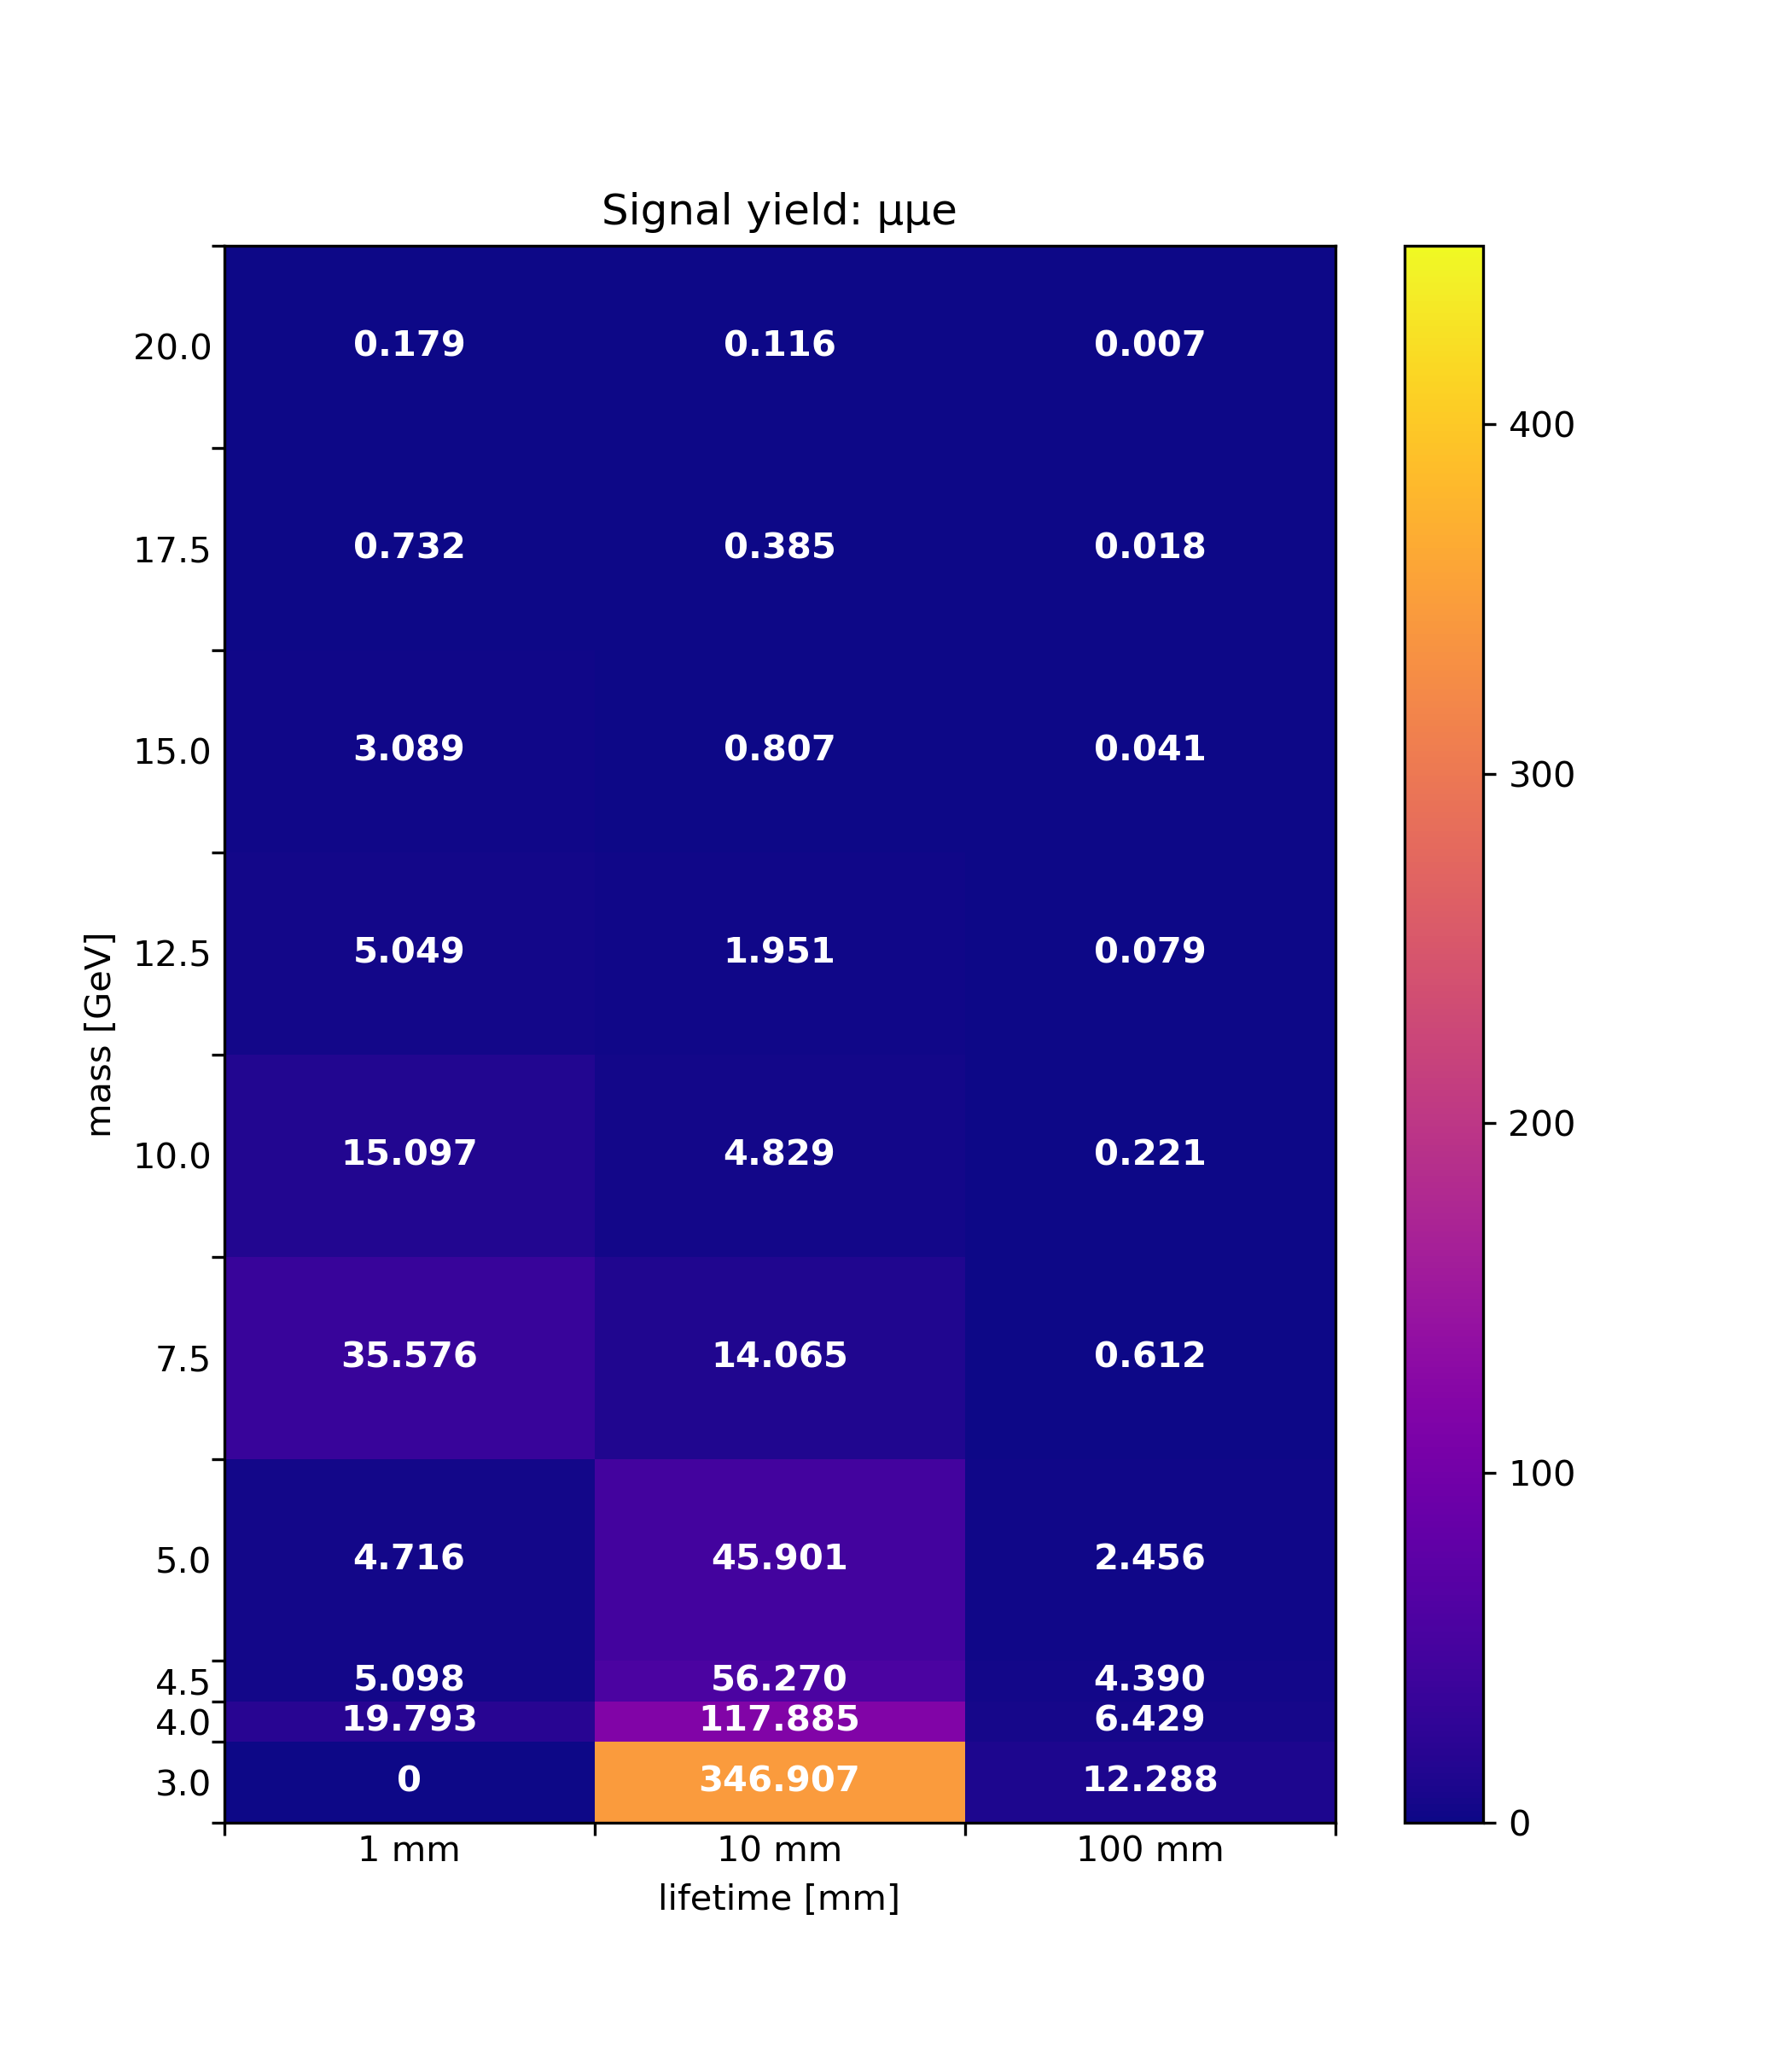

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


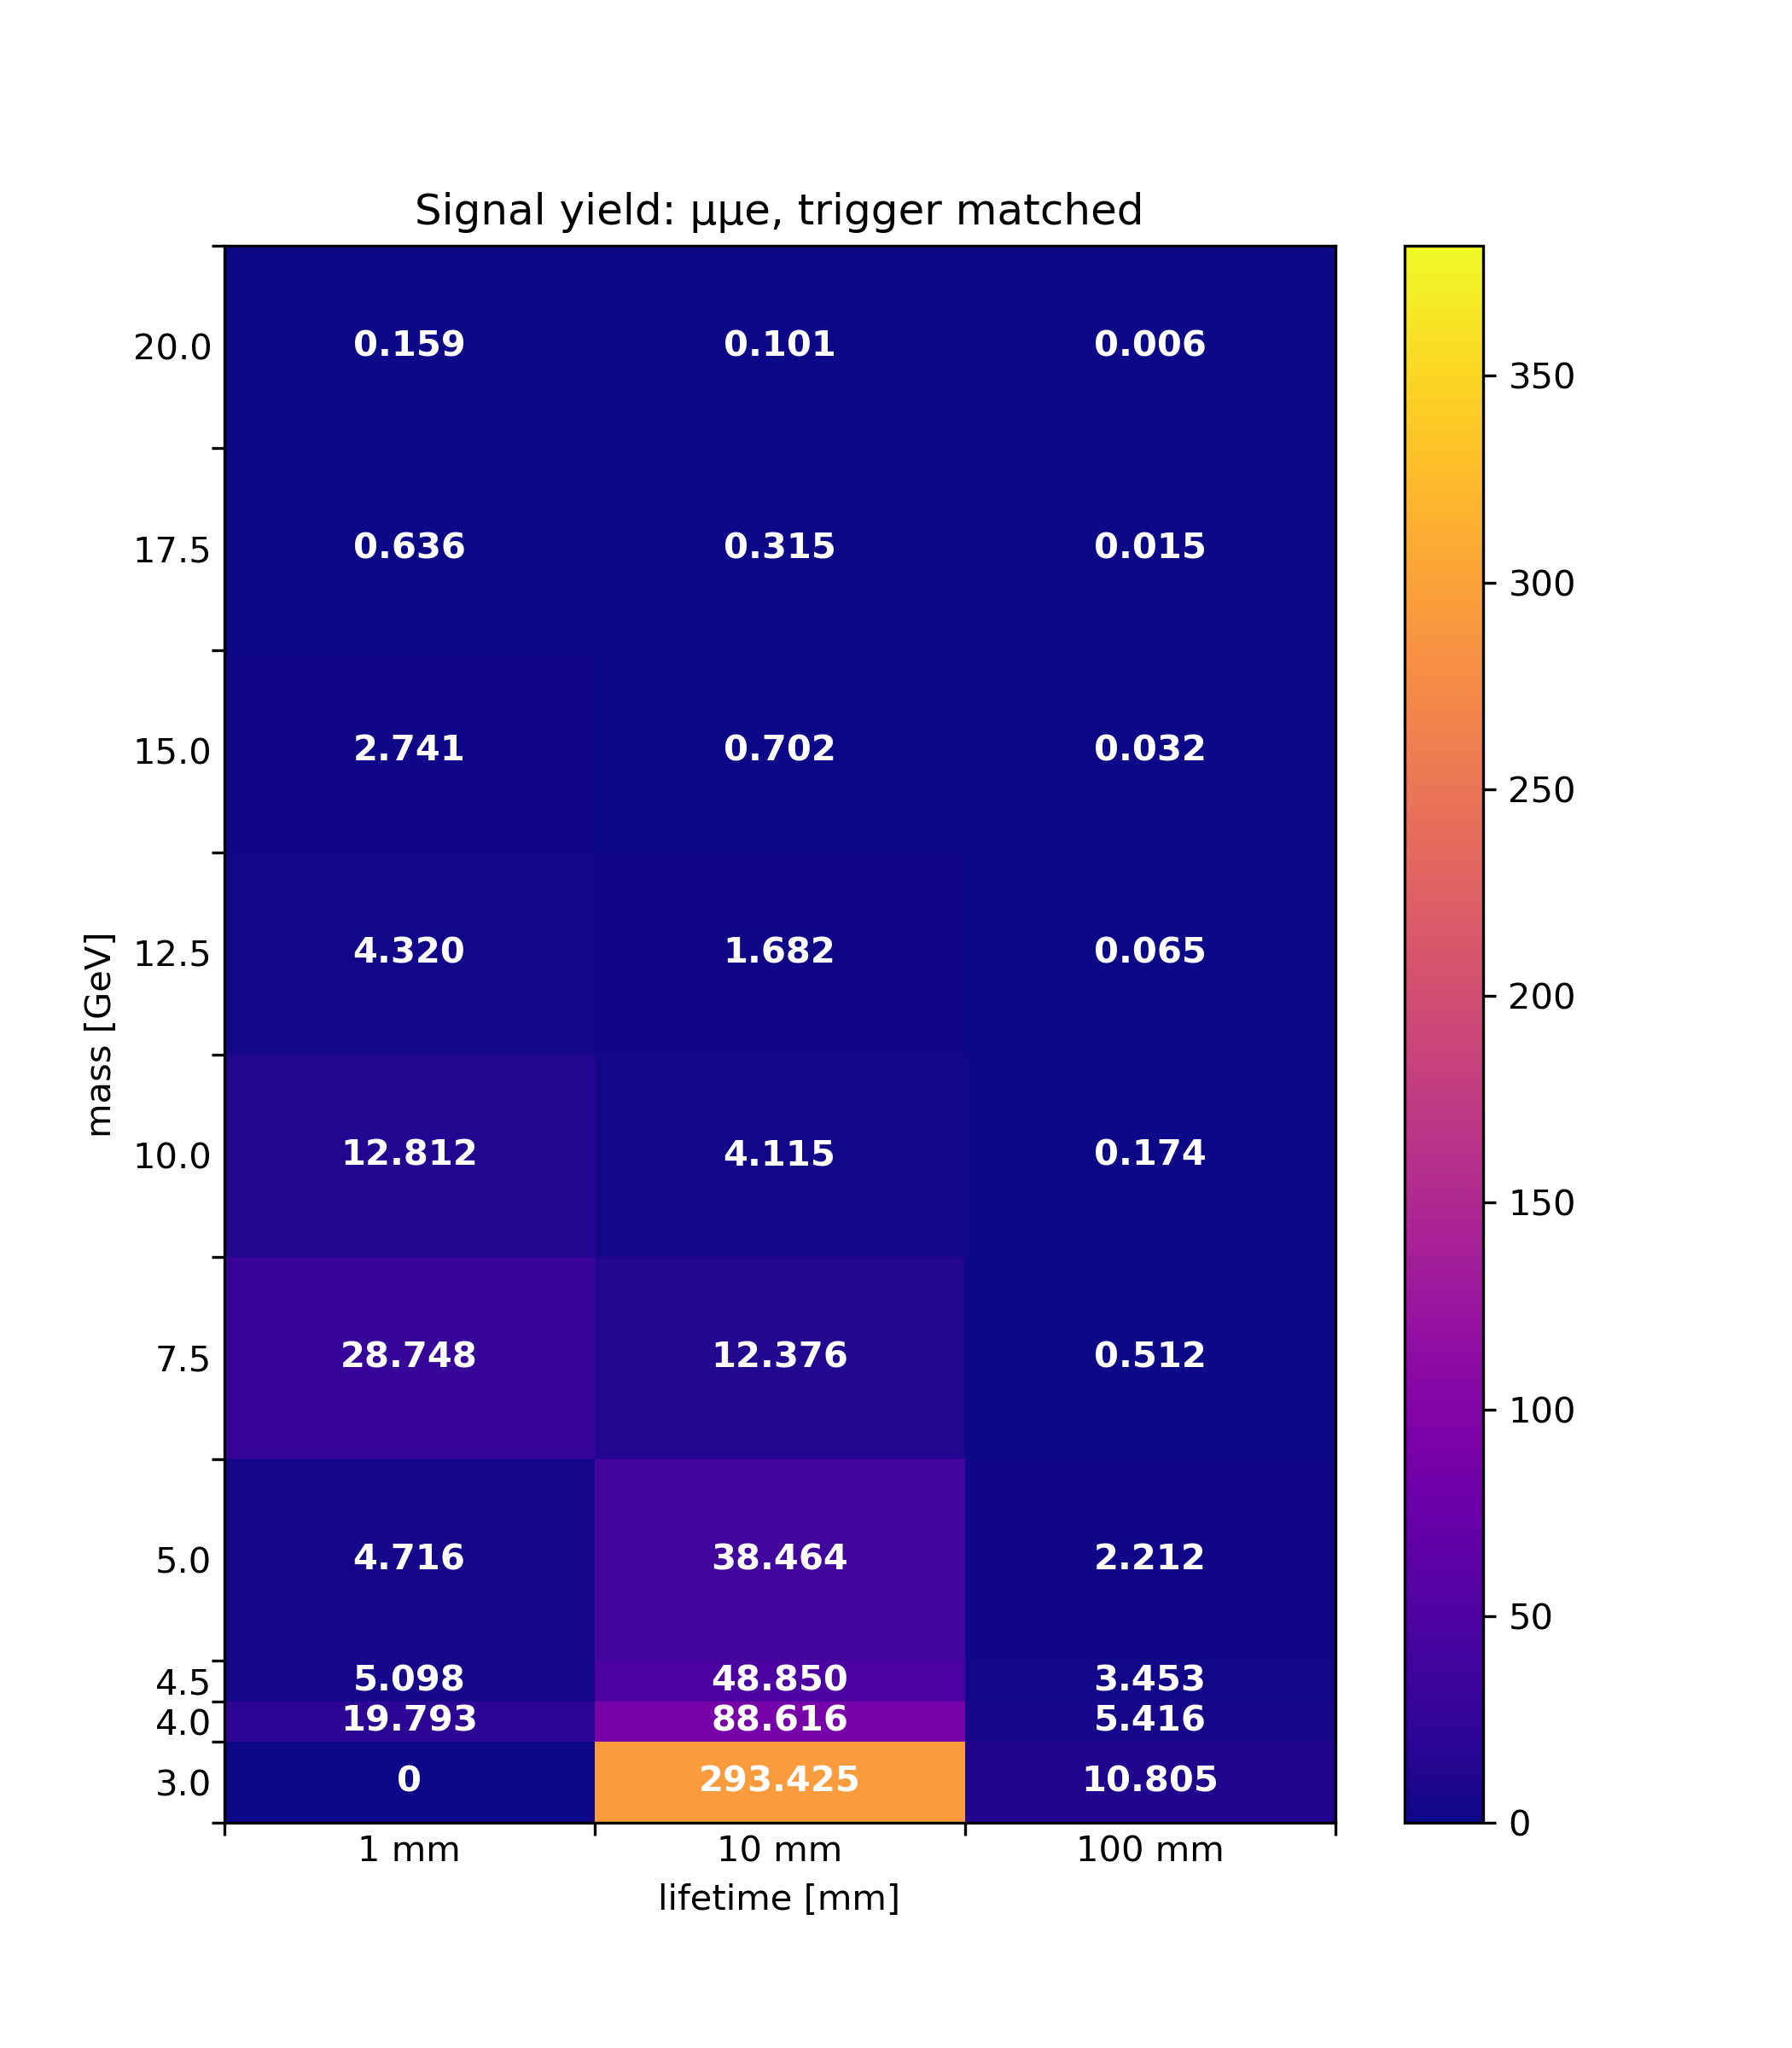

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


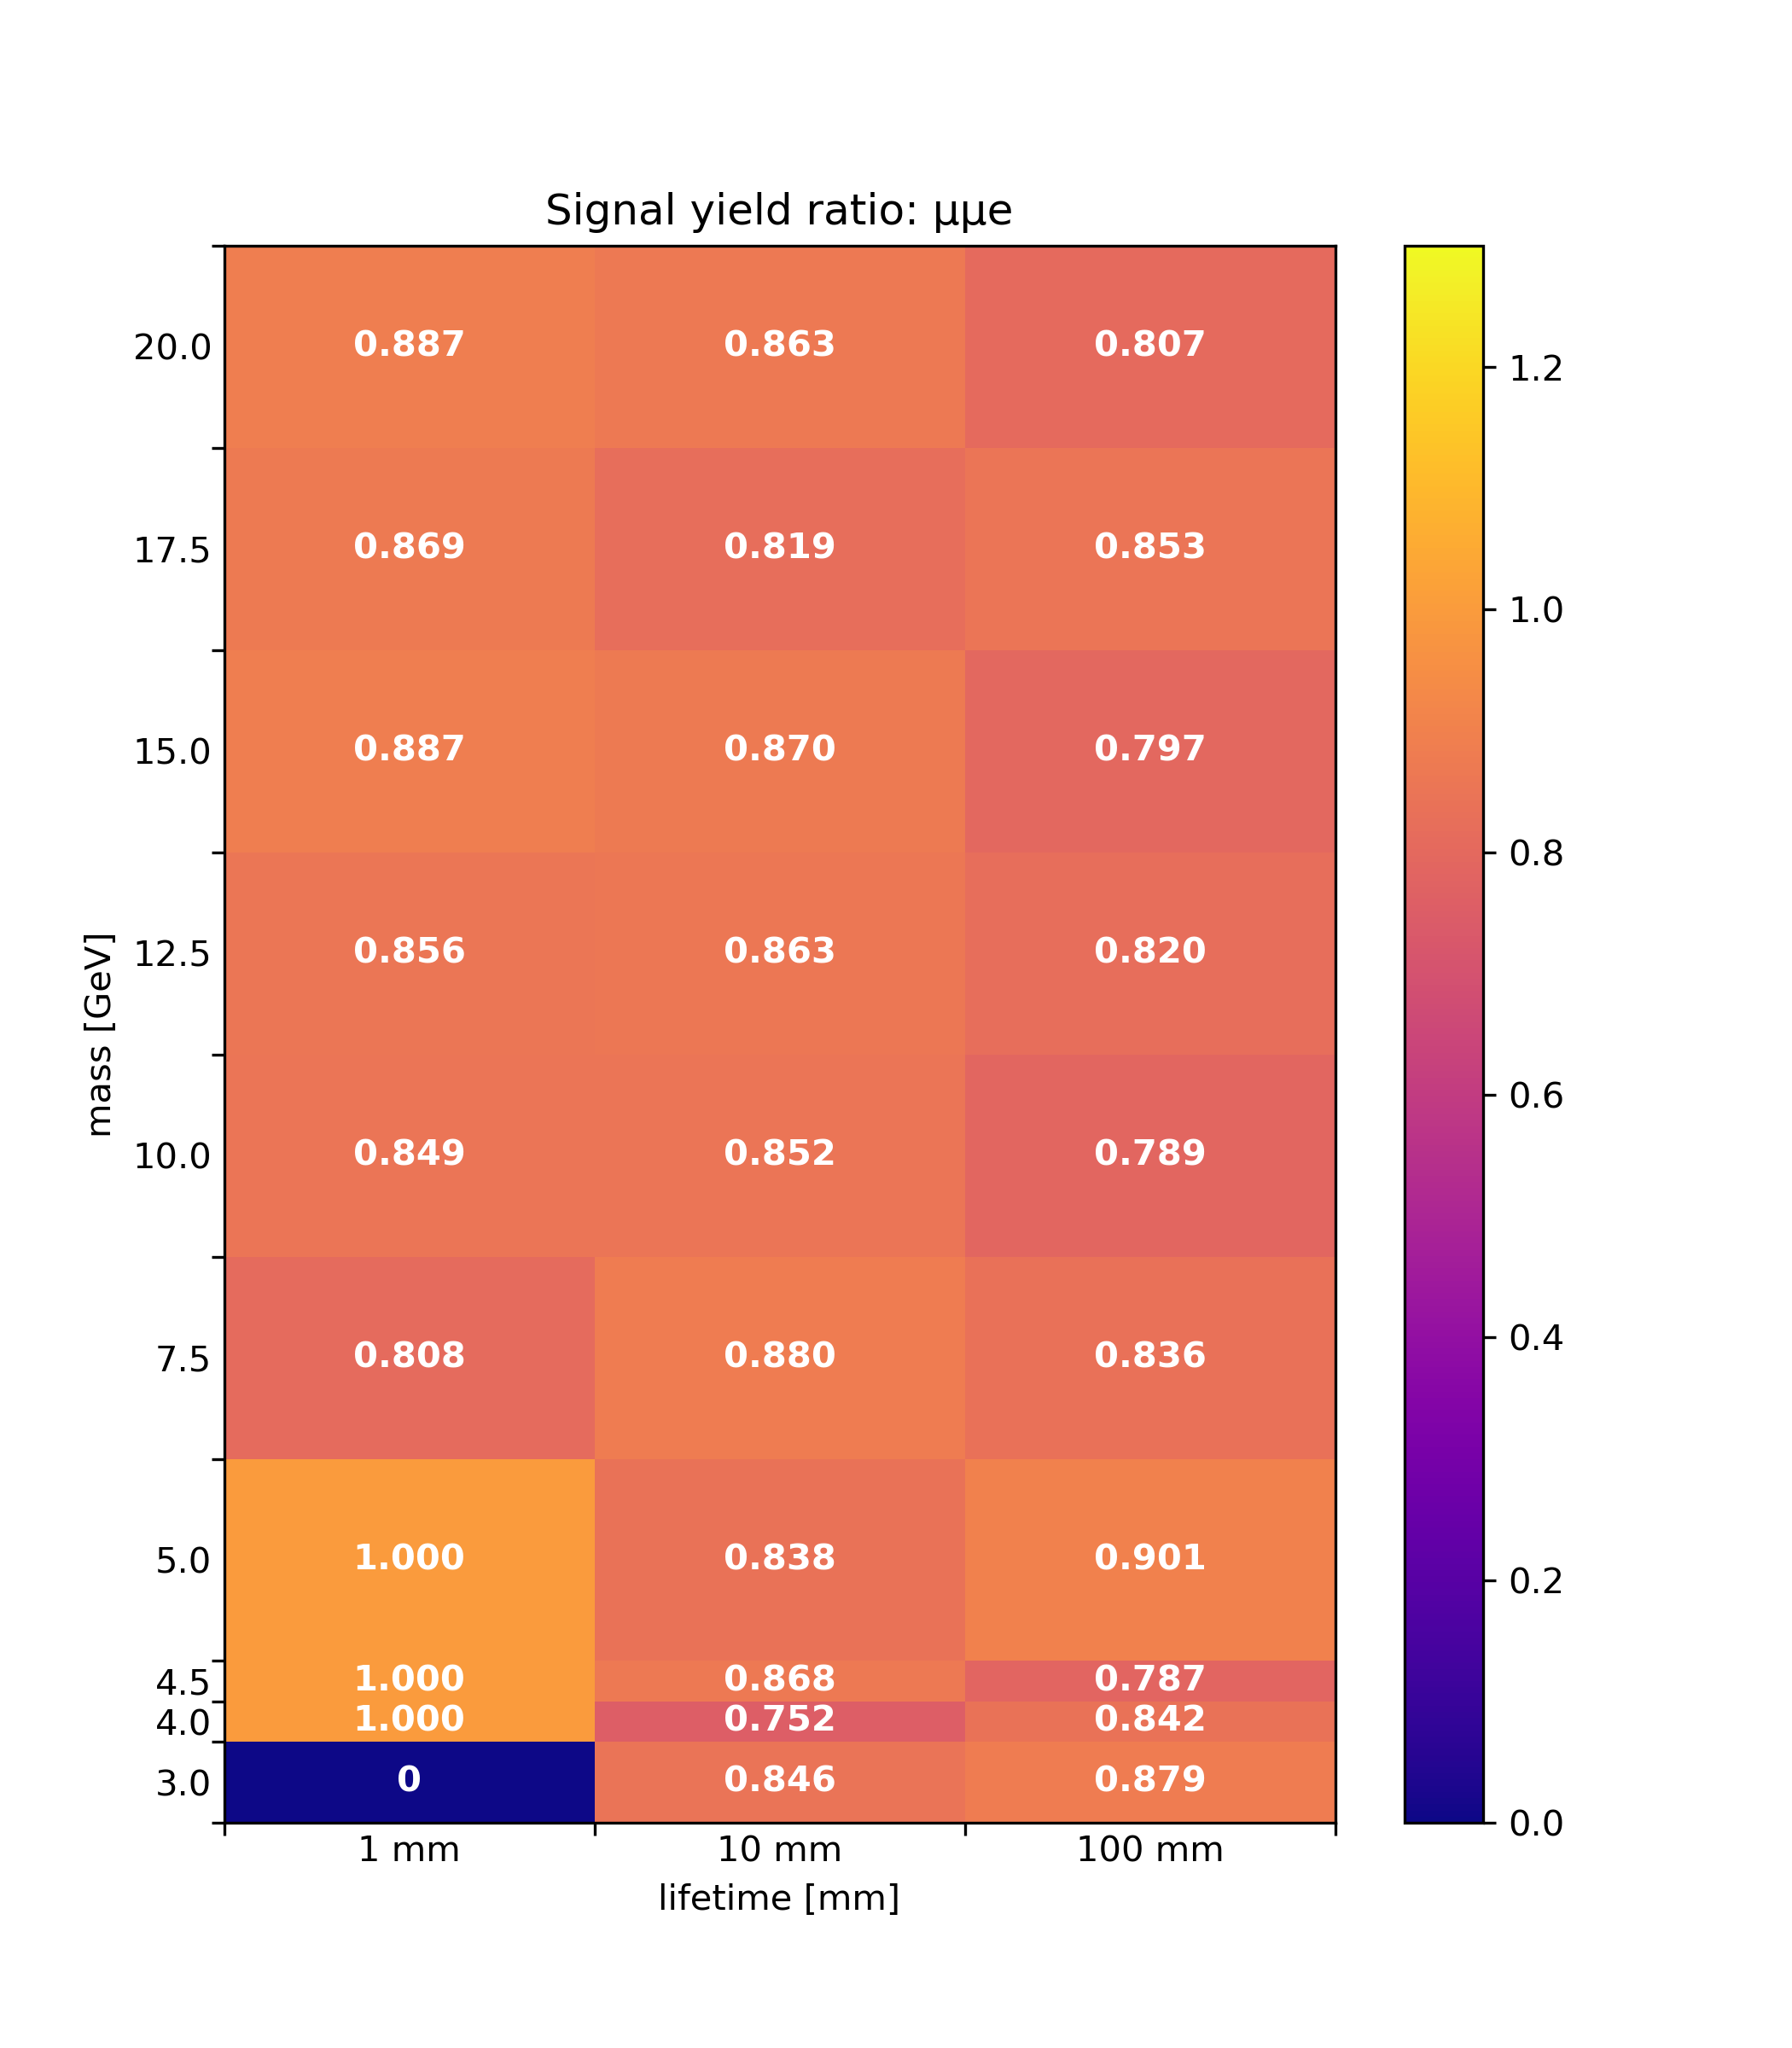

In [14]:

import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools


masses = [3.0, 4.0, 4.5, 5.0, 7.5, 10.0, 12.5, 15.0, 17.5, 20.0, 22.5]
lifetimes = {1:0, 10:1, 100:2}

def set_bin_content(mass, lifetime, value, arr):
    ybin = np.max(np.digitize(mass, masses)-1, 0)
    xbin = lifetimes[lifetime]
    arr[ybin,xbin] = value

def make_yield_plot(channel, title, outfile, fill_value):

    yield_arr = np.array([
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    ])

    for entry in itertools.product([channel], masses[:-1], list(lifetimes.keys()),):
        try:
            val = eval(fill_value)
        except ZeroDivisionError:
            val = 0
        file_mass = entry[1]
        file_lifetime = entry[2]
        set_bin_content(file_mass, file_lifetime, val, yield_arr)

    # do the plotting
    plot_yields(yield_arr, title, outfile)
    return yield_arr

def plot_yields(yield_arr, title, outfile):
    plt.figure(figsize=[7,8])
    plt.pcolormesh([0,1,2,3], masses, yield_arr, cmap='plasma', vmax=max(yield_arr.ravel())*1.3)

    plt.colorbar()
    ax = plt.gca()

    # mess with x ticks
    ax.set_xticks([0,1,2,3])
    ax.set_xticklabels('')
    ax.set_xticklabels(['1 mm', '10 mm', '100 mm',], minor=True)
    ax.set_xticks([0.5,1.5,2.5,], minor=True)
    ax.tick_params(axis='both', which='minor', length=0)

    # mess with y ticks
    ax.set_yticks(masses)
    ax.set_yticklabels('')
    ax.tick_params(which='minor', length=0)
    ax.set_yticks(masses[:-1] + np.diff(masses)/2, minor=True)
    ax.set_yticklabels(masses[:-1], minor=True)

    # print(ax.yaxis.get_major_ticks())
    ax.set_title(title)
    ax.set_xlabel('lifetime [mm]')
    ax.set_ylabel('mass [GeV]')

    # set text
    for i in range(len(masses)-1):
        for j in range(len(lifetimes)):
            yloc = j+.5
            xloc = masses[i] + (masses[i+1]-masses[i])/2 
            # text = ax.text(yloc, xloc , f'{yield_arr[i,j]*100:0.2f}%', ha="center", va="center", color="w", transform=ax.transData)
            text_string = f'{yield_arr[i,j]:0.3f}' if yield_arr[i,j] > 0 else '0'
            text = ax.text(yloc, xloc , text_string, ha="center", va="center", color="w", fontweight='bold', transform=ax.transData)

    plt.savefig('/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/'+outfile+'.png', dpi=300)
    plt.savefig('/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/'+outfile+'.pdf', dpi=300)

yield_arr = make_yield_plot(channel='uuu', title='Signal yield: μμμ', outfile='uuu_yield', fill_value='yields[entry][0]')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/uuu_yield.png'));

yield_arr = make_yield_plot(channel='uuu', title='Signal yield: μμμ, trigger matched', outfile='uuu_yield_trigger', fill_value='yields[entry][1]')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/uuu_yield_trigger.png'));

yield_arr = make_yield_plot(channel='uuu', title='Signal yield ratio: μμμ', outfile='uuu_yield_ratio', fill_value='yields[entry][1]/yields[entry][0]')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/uuu_yield_ratio.png'));

yield_arr = make_yield_plot(channel='eee', title='Signal yield: eee', outfile='eee_yield', fill_value='yields[entry][0]')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/eee_yield.png'));

yield_arr = make_yield_plot(channel='eee', title='Signal yield: eee, trigger matched', outfile='eee_yield_trigger', fill_value='yields[entry][1]')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/eee_yield_trigger.png'));

yield_arr = make_yield_plot(channel='eee', title='Signal yield ratio: eee', outfile='eee_yield_ratio', fill_value='yields[entry][1]/yields[entry][0]')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/eee_yield_ratio.png'));

yield_arr = make_yield_plot(channel='eeu', title='Signal yield: eeμ', outfile='eeu_yield', fill_value='yields[entry][0]')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/eeu_yield.png'));

yield_arr = make_yield_plot(channel='eeu', title='Signal yield: eeμ, trigger matched', outfile='eeu_yield_trigger', fill_value='yields[entry][1]')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/eeu_yield_trigger.png'));

yield_arr = make_yield_plot(channel='eeu', title='Signal yield ratio: eeμ', outfile='eeu_yield_ratio', fill_value='yields[entry][1]/yields[entry][0]')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/eeu_yield_ratio.png'));

yield_arr = make_yield_plot(channel='uue', title='Signal yield: μμe', outfile='uue_yield', fill_value='yields[entry][0]')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/uue_yield.png'));

yield_arr = make_yield_plot(channel='uue', title='Signal yield: μμe, trigger matched', outfile='uue_yield_trigger', fill_value='yields[entry][1]')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/uue_yield_trigger.png'));

yield_arr = make_yield_plot(channel='uue', title='Signal yield ratio: μμe', outfile='uue_yield_ratio', fill_value='yields[entry][1]/yields[entry][0]')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/trigger_matching/plots/uue_yield_ratio.png'));



In [15]:
yields

{('uue', 3.0, 1): (0.0, 0.0),
 ('uuu', 12.5, 1): (5.147870556813941, 4.73930983680678),
 ('eeu', 20.0, 1): (0.18816362212483928, 0.17496803072736838),
 ('eee', 4.0, 10): (0.0, 0.0),
 ('uuu', 4.5, 10): (0.0, 0.0),
 ('uuu', 17.5, 1): (0.6199161440030699, 0.5687644021719801),
 ('eeu', 7.5, 100): (0.5276369792861788, 0.4661739062127422),
 ('uue', 3.0, 10): (346.90685678207177, 293.42531023934225),
 ('uue', 10.0, 10): (4.829211127003714, 4.115168709841069),
 ('eee', 15.0, 10): (0.16890814802333115, 0.1433484607969387),
 ('uuu', 10.0, 100): (0.15724490402574876, 0.13383023866056637),
 ('eee', 4.0, 100): (0.0, 0.0),
 ('uue', 12.5, 10): (1.9506453975673228, 1.682457882902676),
 ('eee', 5.0, 1): (0.0, 0.0),
 ('eee', 4.5, 100): (0.0, 0.0),
 ('uuu', 3.0, 10): (0.0, 0.0),
 ('eee', 17.5, 100): (0.0032480565545743643, 0.0029331871112652373),
 ('eee', 4.5, 10): (0.0, 0.0),
 ('uuu', 5.0, 10): (0.0, 0.0),
 ('eeu', 4.5, 100): (2.780096390296819, 2.179105536466494),
 ('eeu', 10.0, 100): (0.13592842448669

In [32]:
import uproot
SingleElectronTriggerlist = ["HLT_e24_lhmedium_L1EM20VH", "HLT_e24_lhtight_nod0_ivarloose", "HLT_e26_lhtight_nod0",
                                "HLT_e26_lhtight_nod0_ivarloose", "HLT_e60_lhmedium_nod0", "HLT_e140_lhloose_nod0"]

SingleMuonTriggerlist = ["HLT_mu20_iloose_L1MU15", "HLT_mu24_iloose", "HLT_mu24_ivarloose", "HLT_mu24_imedium",
						 "HLT_mu24_ivarmedium","HLT_mu26_imedium", "HLT_mu26_ivarmedium", "HLT_mu60_0eta105_msonly"]


/home/newhouse/miniconda3/lib/python3.7/site-packages/awkward/array/base.py:394: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return cls.numpy.array(value, copy=False)


In [62]:
def overlap(event_triggers, trigger_list):
    """
    Evaluates whether the event triggers are found in the given trigger list
    https://stackoverflow.com/questions/3170055/test-if-lists-share-any-items-in-python
    overlap([a,b,c], [x,y,z]) # False
    overlap([a,b,c], [b,c,d]) # True
    """
    return not set(event_triggers).isdisjoint(trigger_list)

muon_dsids = [str(k) for k in mc_info.keys()]

passed_list = {'uuu': [], 'uue': []}

for filename in glob.glob('/data/hnl/ntuples/v5p0_ntuples/mc/*/*'):
    if not filename.split('.DAOD_EXOT29.')[0][-6:] in muon_dsids: continue
    info = mc_info[int(filename.split('.DAOD_EXOT29.')[0][-6:])]
    print(info)
    f = uproot.open(filename)
    df = f['outTree'].pandas.df(['passedTriggers', 'passesHnl*Filter'])

    passed = 0
    for x in df['passedTriggers'].array:
        event_triggers = [y.decode('utf8') for y in x]
        # print(overlap(event_triggers, SingleMuonTriggerlist))
        if overlap(event_triggers, SingleElectronTriggerlist):
            # if not overlap(event_triggers, SingleMuonTriggerlist):
                passed += 1
            # print(event_triggers)
    print(passed, ':', passed/len(df['passedTriggers'].array))
    passed_list[info[0]].append(passed)
        


['uuu', '3G', 'lt1dd']
/home/newhouse/miniconda3/lib/python3.7/site-packages/awkward/array/base.py:394: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return cls.numpy.array(value, copy=False)
1 : 5e-05
['uuu', '3G', 'lt10dd']
1 : 5e-05
['uuu', '3G', 'lt100dd']
2 : 0.0002
['uue', '3G', 'lt1dd']
495 : 0.02475
['uue', '3G', 'lt10dd']
120 : 0.006
['uuu', '4G', 'lt1dd']
2 : 0.0001
['uuu', '4G', 'lt10dd']
1 : 5e-05
['uue', '4G', 'lt1dd']
329 : 0.0329
['uue', '4G', 'lt100dd']
32 : 0.0016
['uuu', '4p5G', 'lt10dd']
1 : 0.0001
['uue', '4p5G', 'lt10dd']
184 : 0.0092
['uue', '4p5G', 'lt10dd']
97 : 0.0097
['uue', '4p5G', 'lt100dd']
28 : 0.0014
['uue', '4p5G', 'lt100dd']
10 : 0.001
['uuu', '5G', 'lt1dd']
2 : 0.0002
['uuu', '5G', 'lt10dd']
0 : 0.0
['uuu', '5G', 'lt100dd']
1 : 5e-05


In [65]:
nevents = 30*50000
print('uuu:', sum(passed_list['uuu']), '/', nevents, 'events =', f'{sum(passed_list["uuu"])/nevents*100:0.4f} %
' )
print('uue:', sum(passed_list['uue']), '/', nevents, 'events =', f'{sum(passed_list["uue"])/nevents*100:0.4f} %' )



uuu: 136 / 1500000 events = 0.0091
uue: 27493 / 1500000 events = 1.8329


In [42]:
mc_info = {}
mc_info[311602] = [ "uuu", "3G", "lt1dd"]
mc_info[311603] = [ "uuu", "3G", "lt10dd"]
mc_info[311604] = [ "uuu", "3G", "lt100dd"]
mc_info[311605] = [ "uue", "3G", "lt1dd"]
mc_info[311606] = [ "uue", "3G", "lt10dd"]
mc_info[311607] = [ "uue", "3G", "lt100dd"]
mc_info[311608] = [ "uuu", "4G", "lt1dd"]
mc_info[311609] = [ "uuu", "4G", "lt10dd"]
mc_info[311610] = [ "uuu", "4G", "lt100dd"]
mc_info[311611] = [ "uue", "4G", "lt1dd"]
mc_info[311612] = [ "uue", "4G", "lt10dd"]
mc_info[311613] = [ "uue", "4G", "lt100dd"]
mc_info[311614] = [ "uuu", "4p5G", "lt1dd"]
mc_info[311615] = [ "uuu", "4p5G", "lt10dd"]
mc_info[311616] = [ "uuu", "4p5G", "lt100dd"]
mc_info[311617] = [ "uue", "4p5G", "lt1dd"]
mc_info[311618] = [ "uue", "4p5G", "lt10dd"]
mc_info[311619] = [ "uue", "4p5G", "lt100dd"]
mc_info[311620] = [ "uuu", "5G", "lt1dd"]
mc_info[311621] = [ "uuu", "5G", "lt10dd"]
mc_info[311622] = [ "uuu", "5G", "lt100dd"]
mc_info[311623] = [ "uue", "5G", "lt1dd"]
mc_info[311624] = [ "uue", "5G", "lt10dd"]
mc_info[311625] = [ "uue", "5G", "lt100dd"]
mc_info[311626] = [ "uuu", "7p5G", "lt1dd"]
mc_info[311627] = [ "uuu", "7p5G", "lt10dd"]
mc_info[311628] = [ "uuu", "7p5G", "lt100dd"]
mc_info[311629] = [ "uue", "7p5G", "lt1dd"]
mc_info[311630] = [ "uue", "7p5G", "lt10dd"]
mc_info[311631] = [ "uue", "7p5G", "lt100dd"]
mc_info[311632] = [ "uuu", "10G", "lt1dd"]
mc_info[311633] = [ "uuu", "10G", "lt10dd"]
mc_info[311634] = [ "uuu", "10G", "lt100dd"]
mc_info[311635] = [ "uue", "10G", "lt1dd"]
mc_info[311636] = [ "uue", "10G", "lt10dd"]
mc_info[311637] = [ "uue", "10G", "lt100dd"]
mc_info[311638] = [ "uuu", "12p5G", "lt1dd"]
mc_info[311639] = [ "uuu", "12p5G", "lt10dd"]
mc_info[311640] = [ "uuu", "12p5G", "lt100dd"]
mc_info[311641] = [ "uue", "12p5G", "lt1dd"]
mc_info[311642] = [ "uue", "12p5G", "lt10dd"]
mc_info[311643] = [ "uue", "12p5G", "lt100dd"]
mc_info[311644] = [ "uuu", "15G", "lt1dd"]
mc_info[311645] = [ "uuu", "15G", "lt10dd"]
mc_info[311646] = [ "uuu", "15G", "lt100dd"]
mc_info[311647] = [ "uue", "15G", "lt1dd"]
mc_info[311648] = [ "uue", "15G", "lt10dd"]
mc_info[311649] = [ "uue", "15G", "lt100dd"]
mc_info[311650] = [ "uuu", "17p5G", "lt1dd"]
mc_info[311651] = [ "uuu", "17p5G", "lt10dd"]
mc_info[311652] = [ "uuu", "17p5G", "lt100dd"]
mc_info[311653] = [ "uue", "17p5G", "lt1dd"]
mc_info[311654] = [ "uue", "17p5G", "lt10dd"]
mc_info[311655] = [ "uue", "17p5G", "lt100dd"]
mc_info[311656] = [ "uuu", "20G", "lt1dd"]
mc_info[311657] = [ "uuu", "20G", "lt10dd"]
mc_info[311658] = [ "uuu", "20G", "lt100dd"]
mc_info[311659] = [ "uue", "20G", "lt1dd"]
mc_info[311660] = [ "uue", "20G", "lt10dd"]
mc_info[311661] = [ "uue", "20G", "lt100dd"]

In [73]:
df = uproot.open('/data/hnl/ntuples/v5p0_ntuples/mc/group.phys-exotics.mc16_13TeV.311610.DAOD_EXOT29.e7422_e5984_a875_r11916_r11748_p4482.dhnl_ntuple_v5p0.v2_tree.root/group.phys-exotics.25399608._000001.tree.root')['outTree'].pandas.df(['passedTriggers', 'passesHnl*Filter'])

# np.any(df['passesHnlEFilter'])
df

# df.app

/home/newhouse/miniconda3/lib/python3.7/site-packages/awkward/array/base.py:394: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return cls.numpy.array(value, copy=False)


,passedTriggers,passesHnlMuMuFilter,passesHnlElMuFilter,passesHnlElElFilter,passesHnlMuElFilter
entry,,,,,
0,"[b'HLT_mu26_ivarmedium', b'HLT_mu24_ivarmedium...",True,False,False,False
1,"[b'HLT_mu26_ivarmedium', b'HLT_mu24_ivarmedium...",False,False,False,False
2,[],False,False,False,False
3,[],False,False,False,False
4,[],False,False,False,False
...,...,...,...,...,...
19995,[],False,False,False,False
19996,[],False,False,False,False
19997,[],False,False,False,False
